## Modelling

In [2]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.4MB/s 
     |████████████████████████████████| 9.5MB 29.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


### Importing Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#pip install pmdarima
#import pmdarima as pm
#from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

from datetime import date 
from datetime import datetime 
from datetime import timedelta 

from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

def errors(prediction,actual):
  mae=np.mean(np.abs(prediction-actual))
  mape=np.mean(np.abs(prediction-actual)/np.abs(actual))
  rmse=np.mean((prediction-actual)**2)**0.5
  return({'mae':mae,'mape':mape,'rmse':rmse})

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_including_lag.csv')
df['date']=pd.to_datetime(df['date'])
df.head()

,date,case,death,avg.temp,pop_stay_at_home,air_traffic,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_death,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,0.0,31.5,1096712.0,3545834.0,No,No,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,0.0,34.5,1212883.0,3545834.0,No,No,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,0.0,31.0,1300363.0,3545834.0,No,No,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,0.0,29.5,1126001.0,3545834.0,No,No,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,0.0,31.5,1117075.0,3545834.0,No,No,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             388 non-null    datetime64[ns]
 1   case                             374 non-null    float64       
 2   death                            374 non-null    float64       
 3   avg.temp                         374 non-null    float64       
 4   pop_stay_at_home                 374 non-null    float64       
 5   air_traffic                      374 non-null    float64       
 6   public_holiday                   388 non-null    object        
 7   gatherings                       388 non-null    object        
 8   holiday_surge_cases              388 non-null    int64         
 9   stay_home_order                  388 non-null    int64         
 10  BLM_Protest                      388 non-null    int64        

## Cases

In [6]:
df_case=df.drop(['public_holiday','gatherings','death','lag_14_death','avg.temp','pop_stay_at_home', 'air_traffic'], axis=1)
df_case.head()

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             388 non-null    datetime64[ns]
 1   case                             374 non-null    float64       
 2   holiday_surge_cases              388 non-null    int64         
 3   stay_home_order                  388 non-null    int64         
 4   BLM_Protest                      388 non-null    int64         
 5   travel_ban_china                 388 non-null    int64         
 6   travel_ban_Europe                388 non-null    int64         
 7   travel_ban_Brazil                388 non-null    int64         
 8   days_since_outbreak              388 non-null    int64         
 9   days_since_BLM_Protest           388 non-null    int64         
 10  days_since_Labor Day             388 non-null    int64        

#### Seasonality Check

<Figure size 432x288 with 0 Axes>

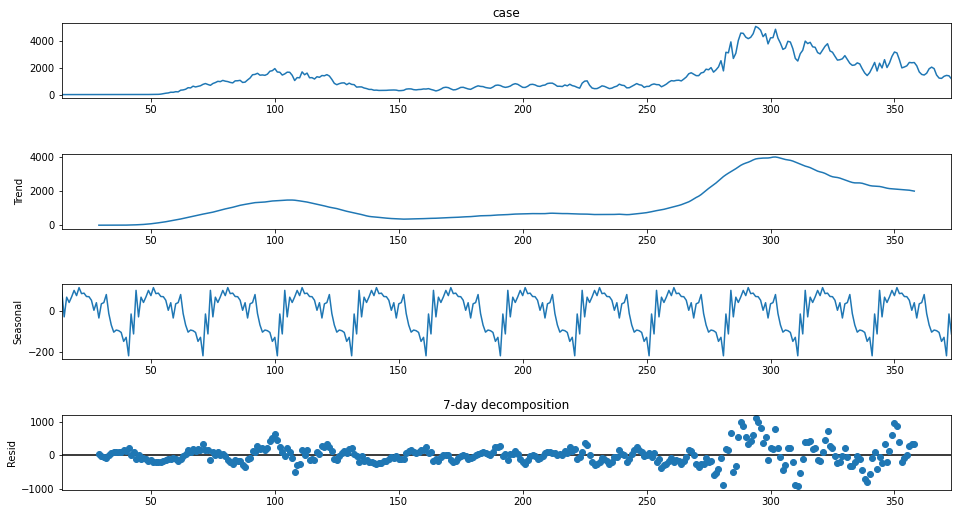

In [8]:
decomposition = seasonal_decompose(df_case.dropna()['case'], freq=30)  
fig = plt.figure()  
fig = decomposition.plot()
plt.title('7-day decomposition')  
fig.set_size_inches(15, 8)

In [9]:
df=df_case[(df_case['date']>='2020-03-01') & (df_case['date']<'2020-04-01')]
df.dropna(inplace=True)
df.head()

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
37,2020-03-01,0.333333,0,0,0,1,1,0,37,0,0,0,0,0,2020,3,1,0,0,1,0,0,0,0.0,22.0,1313889.0,3304198.0,23.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
38,2020-03-02,0.666667,0,0,0,1,1,0,38,0,0,0,0,0,2020,3,2,1,0,0,0,0,0,0.0,28.0,1550369.0,3304198.0,24.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
39,2020-03-03,0.333333,0,0,0,1,1,0,39,0,0,0,0,0,2020,3,3,0,0,0,0,1,0,0.0,34.0,1134668.0,3304198.0,25.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
40,2020-03-04,0.333333,0,0,0,1,1,0,40,0,0,0,0,0,2020,3,4,0,0,0,0,0,1,0.0,28.0,1075087.0,3304198.0,26.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0
41,2020-03-05,0.333333,0,0,0,1,1,0,41,0,0,0,0,0,2020,3,5,0,0,0,1,0,0,0.0,22.0,1103750.0,3304198.0,27.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,0.0


<Figure size 432x288 with 0 Axes>

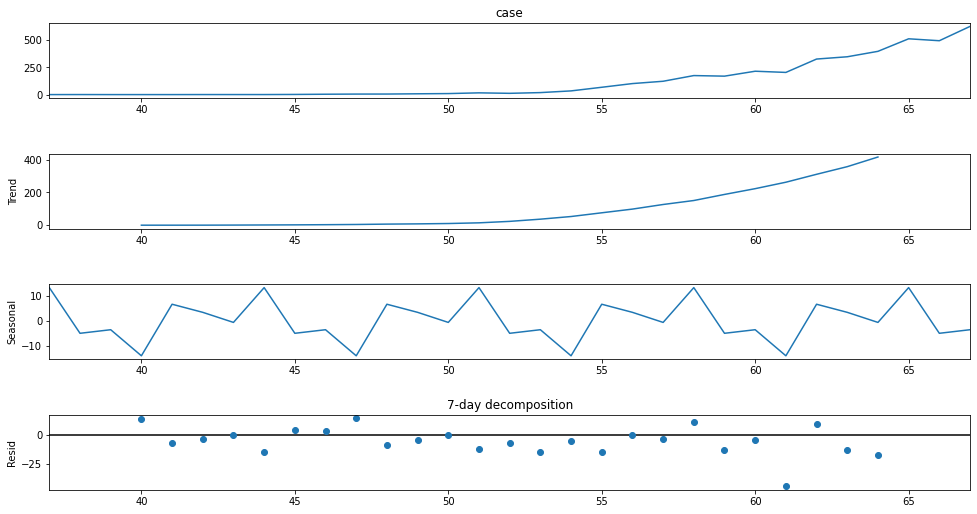

In [10]:
decomposition = seasonal_decompose(df['case'], freq=7)  
fig = plt.figure()  
fig = decomposition.plot()
plt.title('7-day decomposition')  
fig.set_size_inches(15, 8)

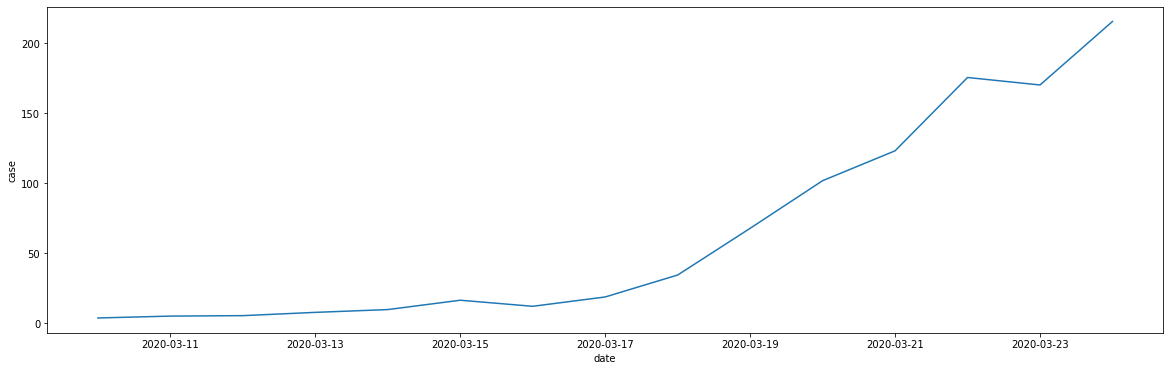

In [11]:
df1=df_case[(df_case['date']>='2020-03-10') & (df_case['date']<'2020-03-25')]


df1['date']=pd.to_datetime(df1['date'])

plt.figure(figsize=(20,6))
sns.lineplot(x='date', y='case', data=df1)

<Figure size 432x288 with 0 Axes>

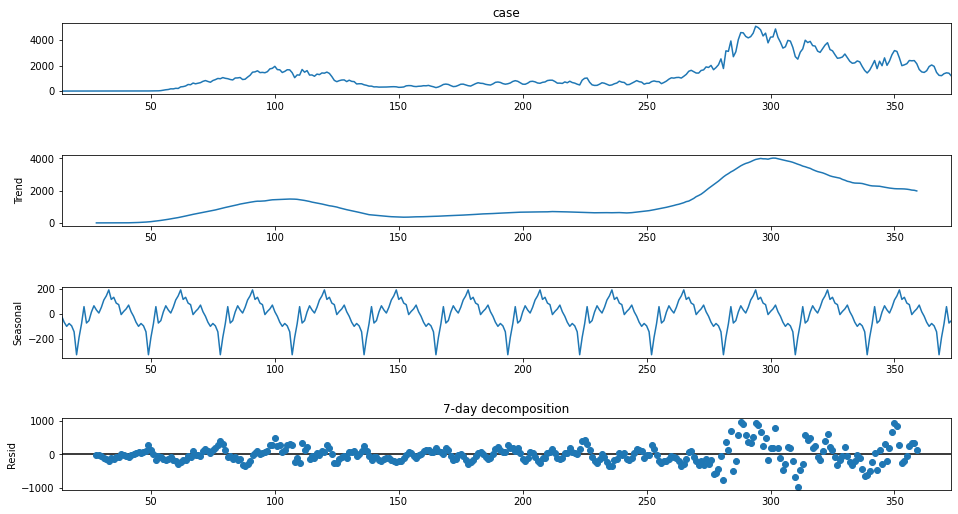

In [12]:
decomposition = seasonal_decompose(df_case.dropna()['case'], freq=29)  
fig = plt.figure()  
fig = decomposition.plot()
plt.title('7-day decomposition')  
fig.set_size_inches(15, 8)

#### Stationarity Check

In [13]:
df_case.head()

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_case.set_index('date',inplace=True)
df_case.head()

,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-24,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.500000,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.333333,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0.000000,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,0.000000,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


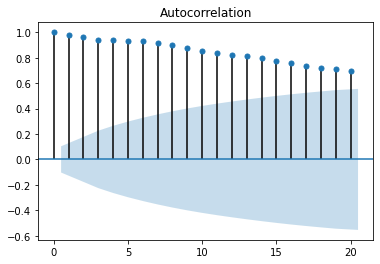

In [15]:
acf=plot_acf(df_case.dropna()['case'], lags= 20)

In [16]:
results=adfuller(df_case.dropna()['case'])
print('p-value: {}'.format(results[1]))

p-value: 0.32357000545306586


**We can not reject the null hypothesis, i.e. the non-stationarity. Hence, this is not stationary data. We need to transform this data to form stationary pattern.**

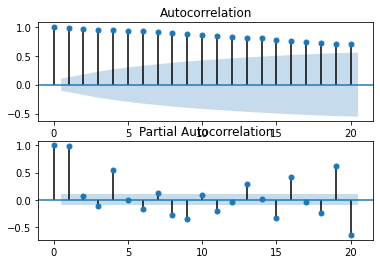

<function matplotlib.pyplot.tight_layout>

In [17]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
acf=plot_acf(df_case.dropna()['case'], lags=20, ax=axes[0])

# Plot the PACF
pacf=plot_pacf(df_case.dropna()['case'], lags=20, ax=axes[1])
plt.show()

plt.tight_layout


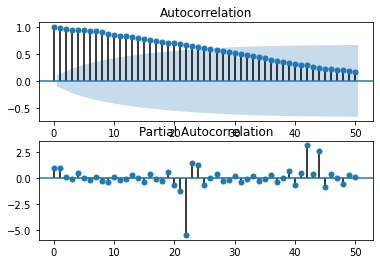

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(df_case.dropna()['case'], lags=50, ax=axes[0])

# Plot the PACF
plot_pacf(df_case.dropna()['case'], lags=50, ax=axes[1])
plt.show()
plt.tight_layout()


The data is non-stationary.

In [20]:
df_case

,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-24,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,0.500000,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0.333333,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0.000000,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,0.000000,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,1206.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
2021-02-11,NaN,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,1360.333333,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
2021-02-12,NaN,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,1428.666667,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0


In [23]:
#df after taking difference

df_averaged_case = df_case[['case']].diff().dropna()
df_averaged_case

,case
date,
2020-01-25,-0.500000
2020-01-26,-0.166667
2020-01-27,-0.333333
2020-01-28,0.000000
2020-01-29,0.000000
...,...
2021-01-27,-25.333333
2021-01-28,154.000000
2021-01-29,68.333333


Text(0.5, 1.0, 'No. of confirmed cases in cook county IL')

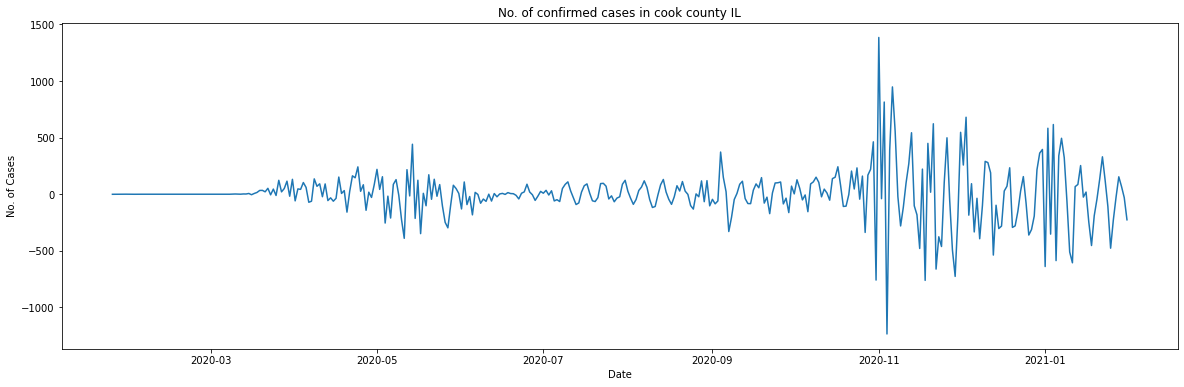

In [24]:
plt.figure(figsize=(20,6))
sns.lineplot(x='date', y='case', data=df_averaged_case)
plt.ylabel('No. of Cases')
plt.xlabel('Date')
plt.title('No. of confirmed cases in cook county IL')

In [25]:
from statsmodels.tsa.stattools import adfuller
results=adfuller(df_averaged_case['case'])
print('p-value: {}'.format(results[1]))

p-value: 9.953154578932004e-05


This is stationary now.

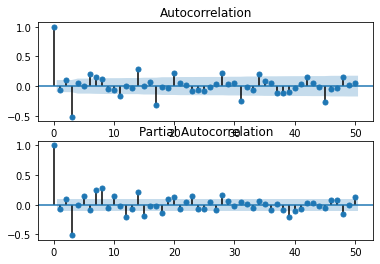

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(df_averaged_case, lags=50, ax=axes[0])

# Plot the PACF
plot_pacf(df_averaged_case, lags=50, ax=axes[1])
plt.show()
plt.tight_layout()


**Order of the model can not be determined from the ACF and PACF**

### ARIMA

#### Determinination of the order of AR and MA model by using AIC and BIC

###### Auto_arima

In [27]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 388 entries, 2020-01-24 to 2021-02-14
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             374 non-null    float64
 1   holiday_surge_cases              388 non-null    int64  
 2   stay_home_order                  388 non-null    int64  
 3   BLM_Protest                      388 non-null    int64  
 4   travel_ban_china                 388 non-null    int64  
 5   travel_ban_Europe                388 non-null    int64  
 6   travel_ban_Brazil                388 non-null    int64  
 7   days_since_outbreak              388 non-null    int64  
 8   days_since_BLM_Protest           388 non-null    int64  
 9   days_since_Labor Day             388 non-null    int64  
 10  days_since_Halloween             388 non-null    int64  
 11  days_since_Thanksgiving          388 non-null    int64  
 12  day

In [ ]:
auto_arima(df_case['case'].dropna(),start_p=1,start_q=1,max_p=10,max_q=10,d=1, start_P=0, start_Q=0, max_P=5, max_Q=5,error_action='ignore',information_criterion='bic',
                       suppress_warnings=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  374
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -2441.551
Date:                Fri, 19 Mar 2021   AIC                           4899.101
Time:                        17:57:05   BIC                           4930.474
Sample:                             0   HQIC                          4911.559
                                - 374                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6955      0.064     10.793      0.000       0.569       0.822
ar.L2         -0.0819      0.055     -1.488      0.137      -0.190       0.026
ar.L3         -0.2145      0.061     -3.521      0.000      -0.334      -0.095
ma.L1         -0.6523      0.052    -12.598      0.000      -0.754      -0.551
ma.L2          0.2456      0.026      9.327      0.000       0.194       0.297
ma.L3         -0.7328      0.029    -25.037      0.000      -0.790      -0.675
ma.L4          0.8427      0.040     20.950      0.000       0.764       0.922
sigma2      3.173e+04   1338.032     23.718      0.000    2.91e+04    3.44e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              8567.22
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              13.04   Skew:                             2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Train/Test/Forecast splitting

In [31]:
df_case.reset_index(inplace=True)
df_case.head()

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2021-02-10,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,1206.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
384,2021-02-11,NaN,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,1360.333333,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
385,2021-02-12,NaN,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,1428.666667,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0
386,2021-02-13,NaN,0,0,0,1,1,1,386,260,159,105,79,50,2021,2,13,0,1,0,0,0,0,1398.666667,23.5,1467123.0,1.044186e+06,372.0,246.0,145.0,91.0,65.0,36.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0


In [34]:
train=df_case[df_case['date']<'2020-10-01'].set_index('date')
test=df_case[(df_case['date']>='2020-10-01') & (df_case['date']<='2021-01-31') ].set_index('date')
forecast=df_case[df_case['date']>='2021-02-01'].set_index('date')

#### Fitting and Predicting

#### Naive average model

In [39]:
test['mean_case']=np.mean(test['case'])
print('Baseline model: Error')
errors(prediction=test['mean_case'],actual=test['case'])

Baseline model: Error


{'mae': 973.330336880605,
 'mape': 0.5523439078894846,
 'rmse': 1154.9649255348759}

#### ARIMA

In [40]:
# Fitting the model and predicting the future
mod = ARIMA(train['case'], order=(3,1,4))
res = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Errors


{'mae': 1644.8369709374467,
 'mape': 0.5657486280845834,
 'rmse': 2007.490190855229}

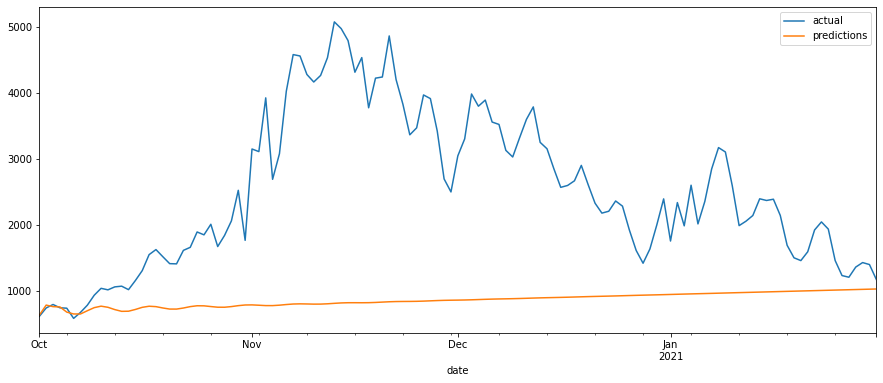

In [41]:
#predict on test data
start=len(train)
end=len(train)+len(test)-1
predictions=res.predict(start,end,typ='levels')

test['case'].plot(legend=True,figsize=(15,6),label='actual')
predictions.plot(legend=True, label='predictions')

print('Errors')
errors(predictions,test['case'])

##### Exogenous

In [ ]:
# Fitting the model and predicting the future
mod = ARIMA(train.dropna()['case'], order=(3,1,4),exog=train.dropna()['lag_14_case'])
res_exog = mod.fit()

Errors


{'mae': 4100.383616448176,
 'mape': 1.7289980355605432,
 'rmse': 4672.195975118491}

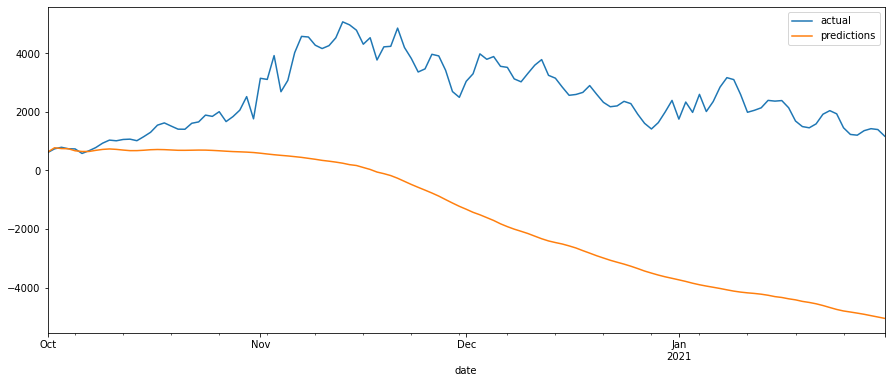

In [ ]:
#predict on test data
start=len(train.dropna())
end=len(train.dropna())+len(test)-1
predictions=res_exog.predict(start,end,typ='levels',exog=test['lag_14_case'])

test['case'].plot(legend=True,figsize=(15,6),label='actual')
predictions.plot(legend=True, label='predictions')

print('Errors')
errors(predictions,test['case'])

##### Short-term Forecasting

Errors


{'mae': 151.31010909455708,
 'mape': 0.15798746833521515,
 'rmse': 201.58269265145026}

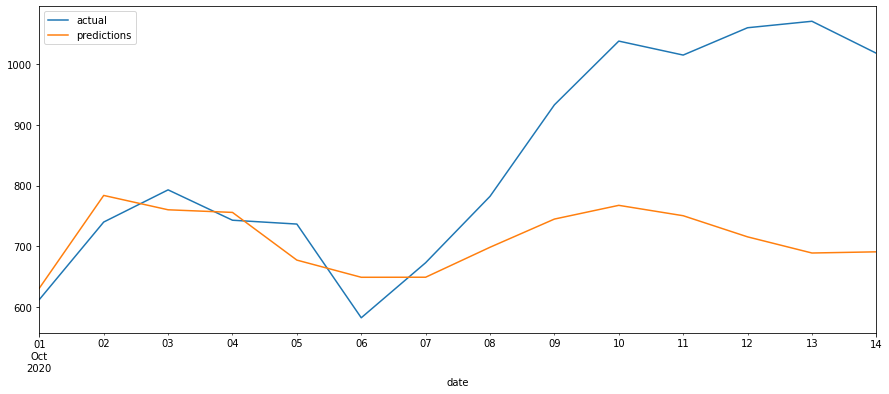

In [ ]:
#predict on test data
start=len(train)
end=len(train)+13
predictions=res.predict(start,end,typ='levels')

test[test['case'].index <= '2020-10-14']['case'].plot(legend=True,figsize=(15,6), label='actual')
predictions.plot(legend=True, label='predictions')

print('Errors')
errors(predictions,test[test['case'].index <= '2020-10-14']['case'])

Errors


{'mae': 160.7073425780854,
 'mape': 0.16726381716987346,
 'rmse': 214.57983402896446}

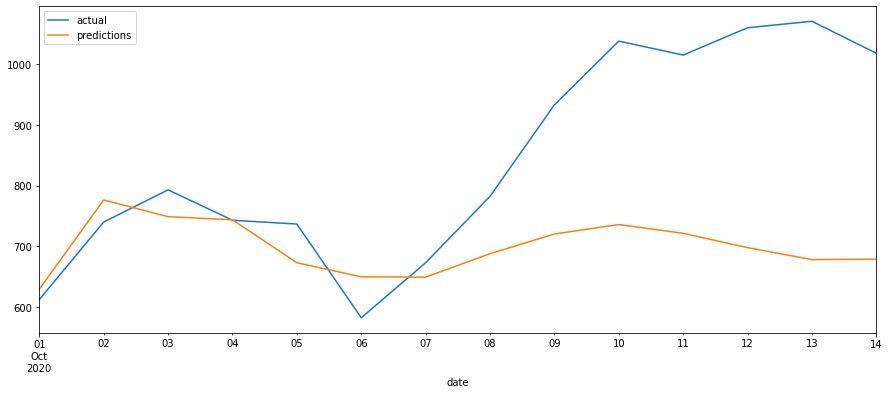

In [ ]:
#predict on test data using Exog
start=len(train.dropna())
end=len(train.dropna())+13
predictions=res_exog.predict(start,end,typ='levels',exog=test[test['case'].index <= '2020-10-15']['lag_14_case'])

test[test['case'].index <= '2020-10-14']['case'].plot(legend=True,figsize=(15,6), label='actual')
predictions.plot(legend=True, label='predictions')

print('Errors')
errors(predictions,test[test['case'].index <= '2020-10-14']['case'])

**Model performance is not improved by adding Exog Variables.**

######Combined short-term forcasting

Errors


{'mae': 544.6386020406425,
 'mape': 0.2255710987683728,
 'rmse': 756.0222718458364}

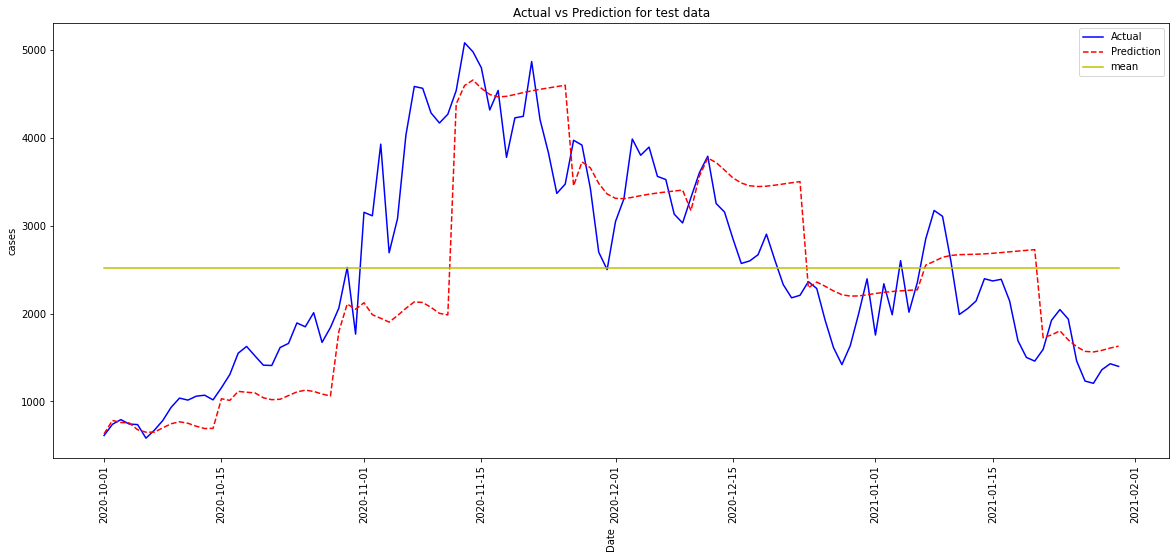

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']

starting_date='2020-10-01'
ending_date='2021-01-31'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<starting_date]
  test=df_case[(df_case["date"]>=starting_date) & (df_case["date"]<pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  train.set_index('date', inplace=True)
  test.set_index('date', inplace=True)

  
  mod = ARIMA(train['case'], order=(3,1,4))
  res = mod.fit()


  #predict on test data
  start=len(train)
  end=len(train)+len(test)-1
  pred_arima=res.predict(start,end,typ='levels')

  pred.append(pred_arima)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<"2020-10-01"]
test=df_case[(df_case["date"]>="2020-10-01")]
test['mean_case']=np.mean(test['case'])

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.plot(test['date'], test['mean_case'], 'y-', label = 'mean')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=test['case'])


### SARIMAX

In [ ]:
df_case.head()

,date,case,avg.temp,pop_stay_at_home,air_traffic,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,31.5,1096712.0,3545834.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,34.5,1212883.0,3545834.0,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,31.0,1300363.0,3545834.0,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,29.5,1126001.0,3545834.0,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,31.5,1117075.0,3545834.0,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fitting the model and predicting

In [ ]:
train=df_case[df_case['date']<'2020-10-01'].set_index('date')
test=df_case[(df_case['date']>='2020-10-01') & (df_case['date']<='2021-01-31') ].set_index('date')
forecast=df_case[df_case['date']>='2021-02-01'].set_index('date')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Errors


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



{'mae': 1644.554793072696,
 'mape': 0.5656594472673514,
 'rmse': 2006.5474987683192}

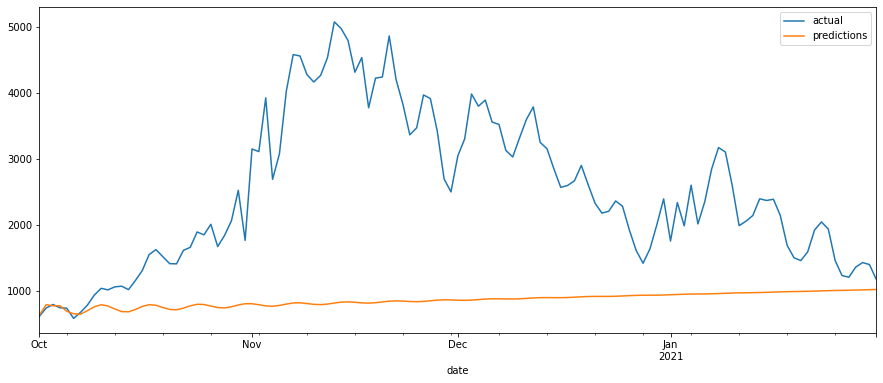

In [ ]:
# Fitting the model and predicting
model = SARIMAX(train['case'], order=(3,1,4), trend='c')
results=model.fit()

start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start,end,typ='levels')

test['case'].plot(legend=True,figsize=(15,6), label='actual')
predictions.plot(legend=True, label='predictions')

print('Errors')
errors(predictions,test['case'])

<Figure size 432x288 with 0 Axes>

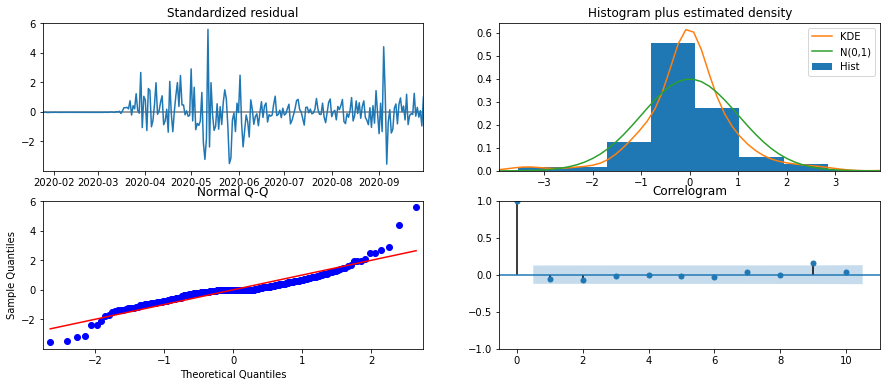

<Figure size 432x288 with 0 Axes>

In [ ]:
#Model evaluation
plt.figure()
results.plot_diagnostics(figsize=(15,6))
plt.show()
plt.tight_layout()

**Model is not performing well.**

#### Short-term forecasting

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/

Errors


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



{'mae': 543.1965198454475,
 'mape': 0.22547996585611754,
 'rmse': 755.2921442214298}

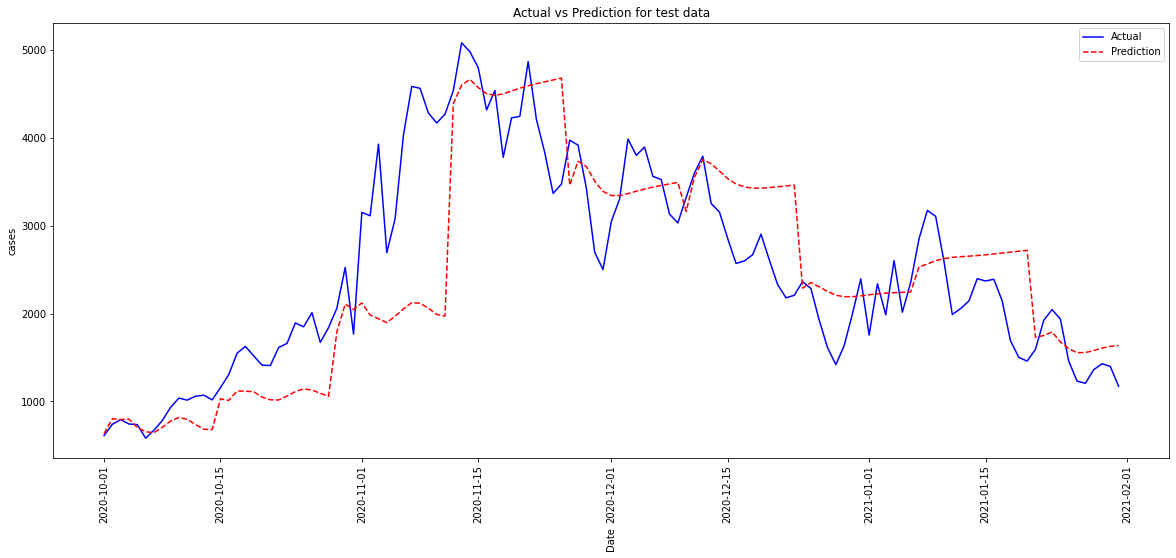

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-31']

starting_date='2020-10-01'
ending_date='2021-01-31'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<starting_date]
  test=df_case[(df_case["date"]>=starting_date) & (df_case["date"]<pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  train.set_index('date', inplace=True)
  test.set_index('date', inplace=True)

  
  model = SARIMAX(train['case'], order=(3,1,4), trend='c')
  results=model.fit()

  #predict on test data
  start=len(train)
  end=len(train)+len(test)-1
  pred_sarimax=results.predict(start,end,typ='levels')


  pred.append(pred_sarimax)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])

train=df_case[df_case["date"]<"2020-10-01"]
test=df_case[(df_case["date"]>="2020-10-01")]

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=test['case'])

#### including Exog variables

In [ ]:
df_case

,date,case,avg.temp,pop_stay_at_home,pop_not_stay_at_home,air_traffic,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,31.5,1096712.0,4083781.0,3.545834e+06,3.723659,0.268553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,34.5,1212883.0,3967610.0,3.545834e+06,3.271222,0.305696,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,31.0,1300363.0,3880130.0,3.545834e+06,2.983882,0.335134,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,29.5,1126001.0,4054492.0,3.545834e+06,3.600789,0.277717,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,31.5,1117075.0,4063418.0,3.545834e+06,3.637552,0.274910,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2021-01-26,1231.666667,31.0,1679133.0,3501360.0,1.044186e+06,2.085219,0.479566,0,0,0,1,1,1,368,311,242,341,242,341,289,246,141,87,61,32,2021,1,26,0,0,0,0,1,0,1989.000000,23.5,1577222.0,1.044186e+06,353.0,227.0,126.0,72.0,46.0,17.0,11.0,1.0,0.0,0.0,1.0,1.0,1.0
369,2021-01-27,1206.333333,26.5,1531688.0,3648805.0,1.044186e+06,2.382212,0.419778,0,0,0,1,1,1,369,312,243,342,243,342,290,247,142,88,62,33,2021,1,27,0,0,0,0,0,1,2056.000000,24.5,1541046.0,1.044186e+06,354.0,228.0,127.0,73.0,47.0,18.0,12.0,1.0,0.0,0.0,1.0,1.0,1.0
370,2021-01-28,1360.333333,19.0,1504432.0,3676061.0,1.044186e+06,2.443488,0.409251,0,0,0,1,1,1,370,313,244,343,244,343,291,248,143,89,63,34,2021,1,28,0,0,0,1,0,0,2142.333333,29.5,1519369.0,1.044186e+06,355.0,229.0,128.0,74.0,48.0,19.0,13.0,1.0,0.0,0.0,1.0,1.0,1.0
371,2021-01-29,1428.666667,18.0,1441925.0,3738568.0,1.044186e+06,2.592762,0.385689,0,0,0,1,1,1,371,314,245,344,245,344,292,249,144,90,64,35,2021,1,29,0,0,0,0,0,0,2395.666667,34.5,1522655.0,1.044186e+06,356.0,230.0,129.0,75.0,49.0,20.0,14.0,1.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
corr=pd.DataFrame(np.abs(df_case.corr()['case']).sort_values(ascending=False)).reset_index()
corr.columns=['features','corr. with cases']
corr

,features,corr. with cases
0,case,1.000000
1,lag_14_case,0.809772
2,days_since_Labor Day,0.698173
3,days_since_BLM_Protest,0.691810
4,days_since_travel_ban_Brazil,0.691810
5,lag_14_days_since_BLM_Protest,0.690025
6,days_since_Memorial Day,0.689144
7,days_since_travel_ban_china,0.686817
8,days_since_travel_ban_Europe,0.686817
9,days_since_outbreak,0.686225


##### lag-14_case only included 

Errors


{'mae': 593.4857446780848,
 'mape': 0.23959883190635525,
 'rmse': 824.6532074956626}

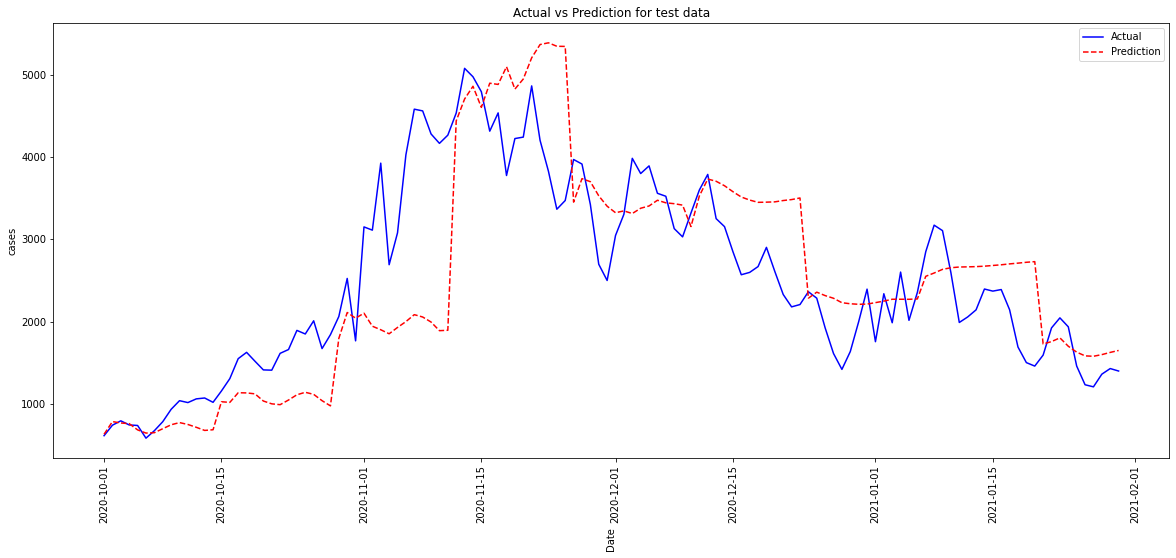

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']

starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  train.set_index('date', inplace=True)
  test.set_index('date', inplace=True)

  
  model = SARIMAX(train['case'], order=(3,1,4), exog=train[['lag_14_case']], trend='c')
  results=model.fit()

  #predict on test data
  start=len(train)
  end=len(train)+len(test)-1
  pred_sarimax=results.predict(start,end,typ='levels', exog=test[['lag_14_case']])


  pred.append(pred_sarimax)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=test['case'])


##### Including other exogenous features 

In [ ]:
corr['features'].head(10).values

array(['case', 'lag_14_case', 'days_since_Labor Day',
       'days_since_BLM_Protest', 'days_since_travel_ban_Brazil',
       'lag_14_days_since_BLM_Protest', 'days_since_Memorial Day',
       'days_since_travel_ban_china', 'days_since_travel_ban_Europe',
       'days_since_outbreak'], dtype=object)

Errors


{'mae': 581.6943011552158,
 'mape': 0.23144308961686305,
 'rmse': 809.7827610750684}

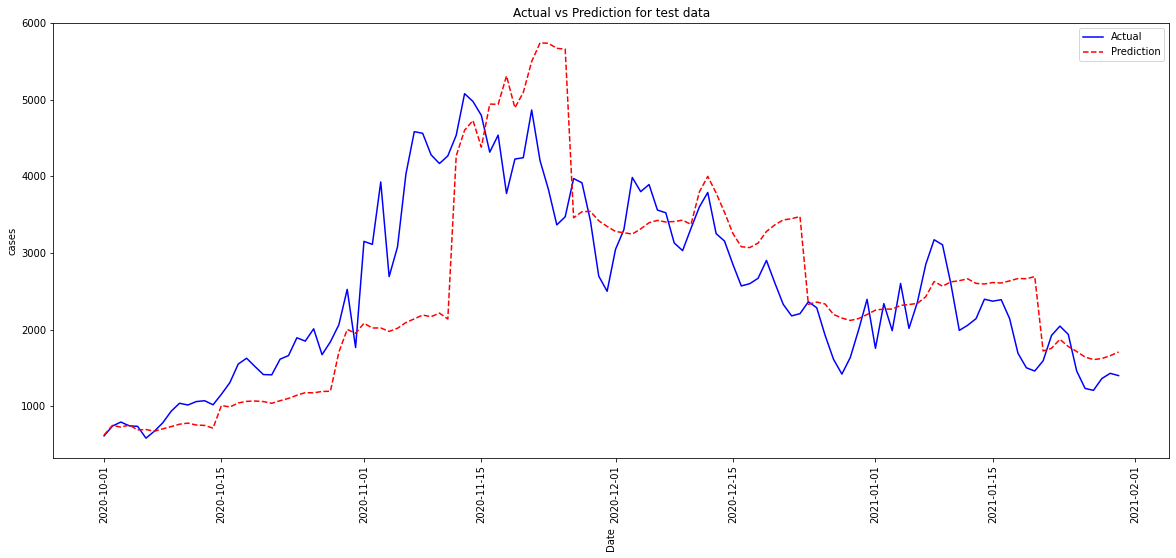

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']

starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  train.set_index('date', inplace=True)
  test.set_index('date', inplace=True)

  
  exog_train=train[['lag_14_case', 'lag_14_days_since_BLM_Protest','days_since_travel_ban_Brazil','lag_14_avg.temp','lag_14_pop_stay_at_home','lag_14_air_traffic', 'days_since_outbreak','lag_14_travel_ban_china']].to_numpy()
  exog_test=test[['lag_14_case', 'lag_14_days_since_BLM_Protest','days_since_travel_ban_Brazil','lag_14_avg.temp','lag_14_pop_stay_at_home','lag_14_air_traffic', 'days_since_outbreak','lag_14_travel_ban_china']].to_numpy()

  #Model fitting and predicting
  model = SARIMAX(train['case'], order=(3,1,4), exog=exog_train)
  results=model.fit()


  #predict on test data
  start=len(train)
  end=len(train)+len(test)-1
  pred_sarimax=results.predict(start,end,typ='levels', exog=exog_test)


  pred.append(pred_sarimax)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=test['case'])


#### Seasonal ARIMA

In [ ]:
df_case.head()

,case,pop_stay_at_home,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,holiday_surge_cases_yes,stay_home_order_yes,BLM_Protest_yes,travel_ban_china_yes,travel_ban_Europe_yes,travel_ban_Brazil_yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases_yes,lag_14_stay_home_order_yes,lag_14_BLM_Protest_yes,lag_14_travel_ban_china_yes,lag_14_travel_ban_Europe_yes,lag_14_travel_ban_Brazil_yes
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-08,0.0,1181713.0,15,0,0,0,0,0,2020,2,8,0,0,0,0,0,0,0,1,0,0,0,0,1.000000,31.5,1096712.0,3545834.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,1476764.0,16,0,0,0,0,0,2020,2,9,0,0,0,0,0,0,0,0,1,0,0,0,0.500000,34.5,1212883.0,3545834.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,0.0,1123777.0,17,0,0,0,0,0,2020,2,10,0,0,0,0,0,0,1,0,0,0,0,0,0.333333,31.0,1300363.0,3545834.0,2.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-11,0.0,1043983.0,18,0,0,0,0,0,2020,2,11,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,29.5,1126001.0,3545834.0,3.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,0.0,1095681.0,19,0,0,0,0,0,2020,2,12,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,31.5,1117075.0,3545834.0,4.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Detrending time series
df_case['case']= df_case['case'] - df_case['case'].rolling(5).mean()
# Drop NaN values
df_case=df_case.dropna()
df_case.head()

,index,case,pop_stay_at_home,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,holiday_surge_cases_yes,stay_home_order_yes,BLM_Protest_yes,travel_ban_china_yes,travel_ban_Europe_yes,travel_ban_Brazil_yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases_yes,lag_14_stay_home_order_yes,lag_14_BLM_Protest_yes,lag_14_travel_ban_china_yes,lag_14_travel_ban_Europe_yes,lag_14_travel_ban_Brazil_yes
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-08,15,0.0,1181713.0,15,0,0,0,0,0,2020,2,8,0,0,0,0,0,0,0,1,0,0,0,0,1.000000,31.5,1096712.0,3545834.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,16,0.0,1476764.0,16,0,0,0,0,0,2020,2,9,0,0,0,0,0,0,0,0,1,0,0,0,0.500000,34.5,1212883.0,3545834.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,17,0.0,1123777.0,17,0,0,0,0,0,2020,2,10,0,0,0,0,0,0,1,0,0,0,0,0,0.333333,31.0,1300363.0,3545834.0,2.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-11,18,0.0,1043983.0,18,0,0,0,0,0,2020,2,11,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,29.5,1126001.0,3545834.0,3.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,19,0.0,1095681.0,19,0,0,0,0,0,2020,2,12,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,31.5,1117075.0,3545834.0,4.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0


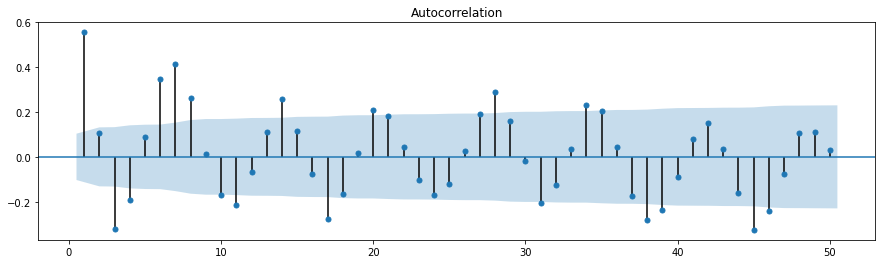

In [ ]:
# acf
fig, ax = plt.subplots(1,1, figsize=(15,4))
# Plot ACF
plot_acf(df_case['case'], ax=ax, lags=50, zero=False)
plt.show()

**No Seasonality**


### LSTM

In [ ]:
df_case.head()

,case,pop_stay_at_home,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,holiday_surge_cases_yes,stay_home_order_yes,BLM_Protest_yes,travel_ban_china_yes,travel_ban_Europe_yes,travel_ban_Brazil_yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases_yes,lag_14_stay_home_order_yes,lag_14_BLM_Protest_yes,lag_14_travel_ban_china_yes,lag_14_travel_ban_Europe_yes,lag_14_travel_ban_Brazil_yes
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-08,0.0,1181713.0,15,0,0,0,0,0,2020,2,8,0,0,0,0,0,0,0,1,0,0,0,0,1.000000,31.5,1096712.0,3545834.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,1476764.0,16,0,0,0,0,0,2020,2,9,0,0,0,0,0,0,0,0,1,0,0,0,0.500000,34.5,1212883.0,3545834.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,0.0,1123777.0,17,0,0,0,0,0,2020,2,10,0,0,0,0,0,0,1,0,0,0,0,0,0.333333,31.0,1300363.0,3545834.0,2.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-11,0.0,1043983.0,18,0,0,0,0,0,2020,2,11,0,0,0,0,0,0,0,0,0,0,1,0,0.000000,29.5,1126001.0,3545834.0,3.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,0.0,1095681.0,19,0,0,0,0,0,2020,2,12,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,31.5,1117075.0,3545834.0,4.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Univariate

In [ ]:
df=df_case[['date','case']]

In [ ]:
train=df[df['date']<'2020-10-01'].set_index('date')
test=df[(df['date']>='2020-10-01') & (df['date']<='2021-01-31') ].set_index('date')
forecast=df[df['date']>='2021-02-01'].set_index('date')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

##### length=14

In [ ]:
length=14
n_features=scaled_train.shape[1]

In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 14, 50)            30200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

model.fit(train_generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop] )

Epoch 1/100
237/237 [==============================] - 21s 65ms/step - loss: 0.0351 - val_loss: 0.9611
Epoch 2/100
237/237 [==============================] - 15s 63ms/step - loss: 0.0145 - val_loss: 0.3156
Epoch 3/100
237/237 [==============================] - 15s 62ms/step - loss: 0.0140 - val_loss: 0.2416
Epoch 4/100
237/237 [==============================] - 15s 62ms/step - loss: 0.0096 - val_loss: 0.2877


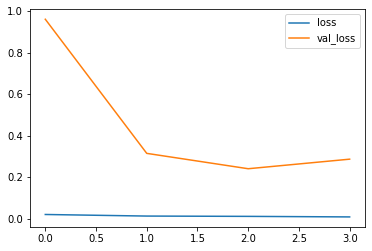

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
#Predictions
n_features=scaled_train.shape[1]

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[   841.60307989],
       [   853.67485526],
       [   866.77405754],
       [   878.26856193],
       [   895.2194894 ],
       [   918.85631168],
       [   949.013987  ],
       [   982.23570126],
       [  1015.39195299],
       [  1043.19794178],
       [  1062.4439255 ],
       [  1085.74627697],
       [  1111.18222201],
       [  1143.24858612],
       [  1172.7860415 ],
       [  1194.45344609],
       [  1217.21985918],
       [  1240.73118275],
       [  1264.44408935],
       [  1288.5463075 ],
       [  1312.79388249],
       [  1336.81701452],
       [  1360.48373944],
       [  1383.8393153 ],
       [  1407.12169319],
       [  1430.69247568],
       [  1454.3662433 ],
       [  1478.04774636],
       [  1501.47906017],
       [  1524.82482243],
       [  1548.4049567 ],
       [  1572.18598127],
       [  1596.15392619],
       [  1620.31756598],
       [  1644.67205155],
       [  1669.18667209],
       [  1693.89652568],
       [  1718.88577843],
       [  17

In [ ]:
test['Predictions'] = actual_predictions
test

,case,Predictions
date,,
2020-10-01,612.333333,841.603080
2020-10-02,740.000000,853.674855
2020-10-03,793.000000,866.774058
2020-10-04,743.000000,878.268562
2020-10-05,736.666667,895.219489
...,...,...
2021-01-27,1206.333333,-13860.294814
2021-01-28,1360.333333,-12766.908471
2021-01-29,1428.666667,-10520.596518


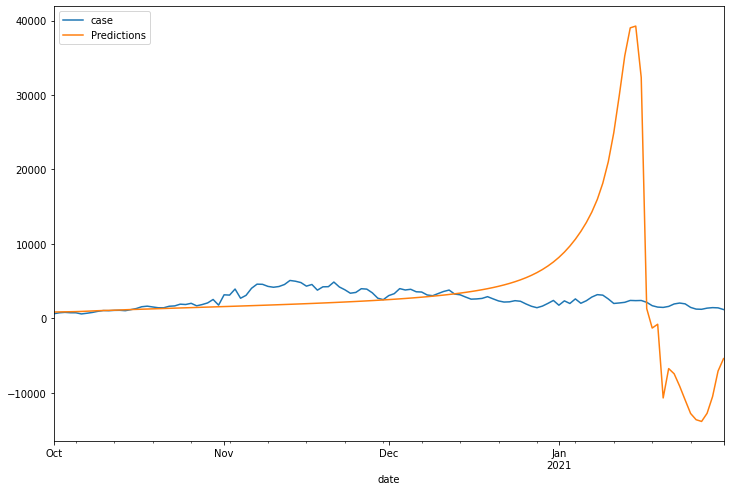

In [ ]:
test.plot(figsize=(12,8))

##### length=7

In [ ]:
length=7
n_features=scaled_train.shape[1]

In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 100)            40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 50)             30200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(train_generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop] )

Epoch 1/100
244/244 [==============================] - 11s 34ms/step - loss: 0.0647 - val_loss: 4.5942
Epoch 2/100
244/244 [==============================] - 8s 34ms/step - loss: 0.0087 - val_loss: 2.3423
Epoch 3/100
244/244 [==============================] - 8s 33ms/step - loss: 0.0097 - val_loss: 1.1935
Epoch 4/100
244/244 [==============================] - 8s 33ms/step - loss: 0.0085 - val_loss: 0.8920
Epoch 5/100
244/244 [==============================] - 8s 33ms/step - loss: 0.0092 - val_loss: 0.3238
Epoch 6/100
244/244 [==============================] - 8s 34ms/step - loss: 0.0059 - val_loss: 0.4440


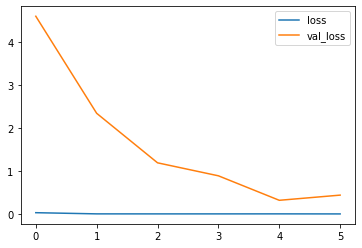

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
n_features=scaled_train.shape[1]

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[692.98079717],
       [704.82408869],
       [691.22623974],
       [659.87014985],
       [644.22749162],
       [637.06858096],
       [664.88028473],
       [676.70129359],
       [669.96136621],
       [660.58885223],
       [654.17687249],
       [654.54390138],
       [658.38979614],
       [663.4868103 ],
       [662.48634195],
       [658.8076826 ],
       [656.52001542],
       [656.26324528],
       [657.32929161],
       [658.23139298],
       [658.17666769],
       [656.93276417],
       [655.8532097 ],
       [655.51937389],
       [655.61901087],
       [655.69694245],
       [655.46586087],
       [654.96455875],
       [654.4122836 ],
       [654.06926918],
       [653.89649197],
       [653.72902566],
       [653.47190917],
       [653.13270473],
       [652.78056943],
       [652.47623217],
       [652.23054564],
       [651.99715498],
       [651.73951894],
       [651.45746434],
       [651.1717152 ],
       [650.90097511],
       [650.64853451],
       [650

In [ ]:
test['Predictions'] = actual_predictions
test

,case,Predictions
date,,
2020-10-01,612.333333,692.980797
2020-10-02,740.000000,704.824089
2020-10-03,793.000000,691.226240
2020-10-04,743.000000,659.870150
2020-10-05,736.666667,644.227492
...,...,...
2021-01-27,1206.333333,637.582410
2021-01-28,1360.333333,637.476712
2021-01-29,1428.666667,637.372168


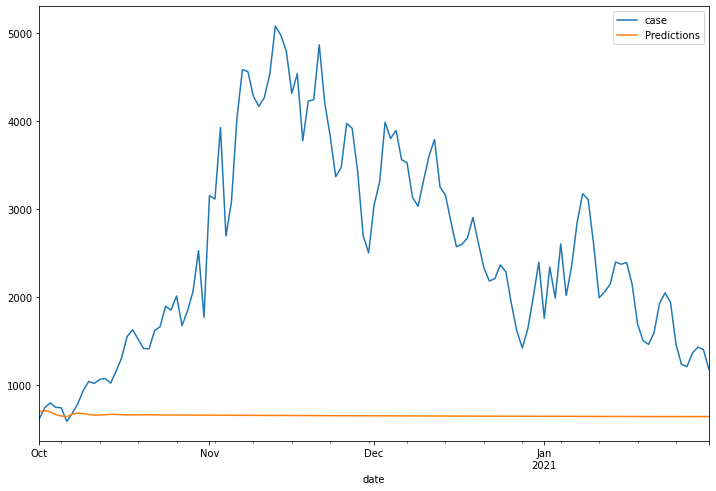

In [ ]:
test.plot(figsize=(12,8))

##### length=30

In [ ]:
length=30
n_features=scaled_train.shape[1]

In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 100)           40800     
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 50)            30200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                2440      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 73,451
Trainable params: 73,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(train_generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop] )

Epoch 1/100
221/221 [==============================] - 30s 125ms/step - loss: 0.0398 - val_loss: 1.0244
Epoch 2/100
221/221 [==============================] - 28s 125ms/step - loss: 0.0148 - val_loss: 0.1625
Epoch 3/100
221/221 [==============================] - 28s 128ms/step - loss: 0.0128 - val_loss: 0.3895


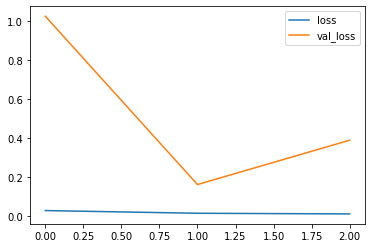

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
n_features=scaled_train.shape[1]

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[ 813.04265565],
       [ 821.48385835],
       [ 830.63504663],
       [ 841.79785112],
       [ 853.14347732],
       [ 866.3741242 ],
       [ 883.12029365],
       [ 903.90603226],
       [ 926.22586852],
       [ 949.23993087],
       [ 972.53166056],
       [ 995.67364615],
       [1019.12458718],
       [1042.05760068],
       [1063.91781378],
       [1084.95587754],
       [1104.73468238],
       [1123.27674186],
       [1141.53108948],
       [1159.6558975 ],
       [1177.07031584],
       [1193.18356538],
       [1209.01764667],
       [1224.08187938],
       [1238.51157582],
       [1252.54918981],
       [1266.07464898],
       [1278.81721324],
       [1290.59596586],
       [1301.86591184],
       [1312.20298791],
       [1321.29789227],
       [1329.76010764],
       [1337.6362775 ],
       [1344.9497236 ],
       [1351.66442424],
       [1357.78684485],
       [1363.29262459],
       [1368.18384165],
       [1372.47677505],
       [1376.19116747],
       [1379.346

In [ ]:
test['Predictions'] = actual_predictions
test

,case,Predictions
date,,
2020-10-01,612.333333,813.042656
2020-10-02,740.000000,821.483858
2020-10-03,793.000000,830.635047
2020-10-04,743.000000,841.797851
2020-10-05,736.666667,853.143477
...,...,...
2021-01-27,1206.333333,1333.157925
2021-01-28,1360.333333,1333.364126
2021-01-29,1428.666667,1333.564785


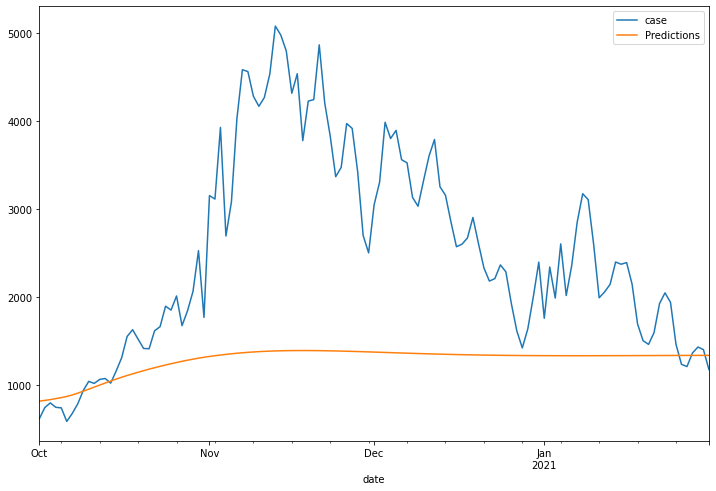

In [ ]:
test.plot(figsize=(12,8))

#### Including Exogenous Variables

In [ ]:
df=df_case[['date','case','lag_14_case']]
df

,date,case,lag_14_case
0,2020-01-24,1.000000,NaN
1,2020-01-25,0.500000,NaN
2,2020-01-26,0.333333,NaN
3,2020-01-27,0.000000,NaN
4,2020-01-28,0.000000,NaN
...,...,...,...
383,2021-02-10,NaN,1231.666667
384,2021-02-11,NaN,1206.333333
385,2021-02-12,NaN,1360.333333
386,2021-02-13,NaN,1428.666667


In [ ]:
train=df.dropna()[df['date']<'2020-10-01'][['date', 'case', 'lag_14_case']].set_index('date')
test=df[(df['date']>='2020-10-01') & (df['date']<='2021-01-31') ][['date', 'case', 'lag_14_case']].set_index('date')
forecast=df[df['date']>='2021-02-01'][['date', 'case', 'lag_14_case']].set_index('date')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [ ]:
length=14
n_features=scaled_train.shape[1]

In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 14, 100)           41200     
_________________________________________________________________
lstm_13 (LSTM)               (None, 14, 50)            30200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 10)                2440      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 73,862
Trainable params: 73,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(train_generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop] )

Epoch 1/100
222/222 [==============================] - 18s 68ms/step - loss: 0.0475 - val_loss: 4.2081
Epoch 2/100
222/222 [==============================] - 15s 67ms/step - loss: 0.0138 - val_loss: 1.7997
Epoch 3/100
222/222 [==============================] - 14s 64ms/step - loss: 0.0113 - val_loss: 0.9000
Epoch 4/100
222/222 [==============================] - 14s 64ms/step - loss: 0.0099 - val_loss: 2.1897


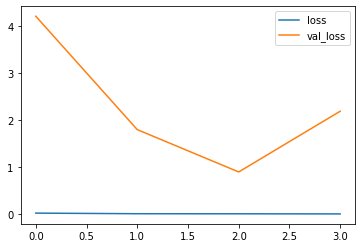

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
n_features=scaled_train.shape[1]

test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.30754152, 0.30128264], dtype=float32),
 array([0.3061173, 0.2987398], dtype=float32),
 array([0.29802945, 0.29551232], dtype=float32),
 array([0.303296  , 0.29326546], dtype=float32),
 array([0.3189738 , 0.29431617], dtype=float32),
 array([0.33248666, 0.29266983], dtype=float32),
 array([0.34003773, 0.29358935], dtype=float32),
 array([0.33819374, 0.293548  ], dtype=float32),
 array([0.33203784, 0.2920224 ], dtype=float32),
 array([0.32661703, 0.2911157 ], dtype=float32),
 array([0.3215606 , 0.28992137], dtype=float32),
 array([0.32246158, 0.2892748 ], dtype=float32),
 array([0.32392722, 0.28945833], dtype=float32),
 array([0.32799175, 0.29221237], dtype=float32),
 array([0.32411894, 0.29299164], dtype=float32),
 array([0.32629004, 0.29380578], dtype=float32),
 array([0.3279817 , 0.29435417], dtype=float32),
 array([0.32998005, 0.29510084], dtype=float32),
 array([0.33153924, 0.29573274], dtype=float32),
 array([0.33226082, 0.2959591 ], dtype=float32),
 array([0.33211908, 0.

In [ ]:
actual_predictions = scaler.inverse_transform(test_predictions)
actual_predictions

array([[595.70792308, 583.58448195],
       [592.94920278, 578.65897501],
       [577.28304961, 572.40736115],
       [587.48435155, 568.05519974],
       [617.85226896, 570.09042633],
       [644.02665904, 566.90146595],
       [658.65308943, 568.68257785],
       [655.08128294, 568.60245264],
       [643.15728894, 565.64740247],
       [632.65719154, 563.89111322],
       [622.86286566, 561.57769975],
       [624.6080713 , 560.32531035],
       [627.44703227, 560.68079382],
       [635.32002714, 566.01535499],
       [627.8183907 , 567.52480316],
       [632.02380982, 569.10179204],
       [635.30057311, 570.16402838],
       [639.17134824, 571.6103231 ],
       [642.19151458, 572.83431077],
       [643.58920309, 573.27274808],
       [643.31465301, 573.14632574],
       [642.8184886 , 573.07884276],
       [642.88337386, 573.39351317],
       [643.5008229 , 574.12924504],
       [644.59099916, 575.18103278],
       [646.24060872, 576.63356203],
       [647.46777138, 577.94512171],
 

In [ ]:
test['Predictions'] = [actual_predictions[i][0] for i in range(actual_predictions.shape[0])]
test

,case,lag_14_case,Predictions
date,,,
2020-10-01,612.333333,481.666667,595.707923
2020-10-02,740.000000,573.000000,592.949203
2020-10-03,793.000000,630.000000,577.283050
2020-10-04,743.000000,776.666667,587.484352
2020-10-05,736.666667,698.333333,617.852269
...,...,...,...
2021-01-27,1206.333333,2056.000000,650.448452
2021-01-28,1360.333333,2142.333333,650.299978
2021-01-29,1428.666667,2395.666667,650.162819


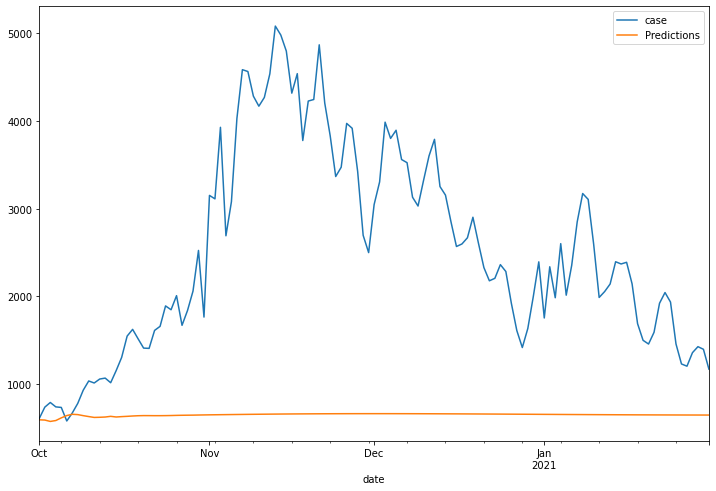

In [ ]:
test[['case','Predictions']].plot(figsize=(12,8))

In [ ]:
errors(test['Predictions'],test['case'])

{'mae': 1851.02970283424,
 'mape': 0.6648762682122275,
 'rmse': 2175.777009335201,
 'smape': 1.0469012872488552}

#### All exogenous

In [ ]:
df_case.columns

Index(['date', 'case', 'avg.temp', 'pop_stay_at_home', 'pop_not_stay_at_home',
       'ratio_pop_not_stay_and_stay', 'ratio_pop_stay_and_not_stay',
       'air_traffic', 'days_since_outbreak', 'days_since_stay_home_order',
       'days_since_BLM_Protest', 'days_since_travel_ban_china',
       'days_since_travel_ban_Brazil', 'days_since_travel_ban_Europe',
       'days_since_Easter', 'days_since_Memorial Day', 'days_since_Labor Day',
       'days_since_Halloween', 'days_since_Thanksgiving',
       'days_since_Christmas Day', 'Year', 'Month', 'Day',
       'holiday_surge_cases_yes', 'stay_home_order_yes', 'BLM_Protest_yes',
       'travel_ban_china_yes', 'travel_ban_Europe_yes',
       'travel_ban_Brazil_yes', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'lag_14_case', 'lag_14_avg.temp',
       'lag_14_pop_stay_at_home', 'lag_14_pop_not_stay_at_home',
       'lag_14_ratio_pop_not_

In [ ]:
df=df_case.copy()
df

,date,case,avg.temp,pop_stay_at_home,pop_not_stay_at_home,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,air_traffic,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,holiday_surge_cases_yes,stay_home_order_yes,BLM_Protest_yes,travel_ban_china_yes,travel_ban_Europe_yes,travel_ban_Brazil_yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_pop_not_stay_at_home,lag_14_ratio_pop_not_stay_and_stay,lag_14_ratio_pop_stay_and_not_stay,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_stay_home_order,lag_14_days_since_BLM_Protest,lag_14_days_since_travel_ban_china,lag_14_days_since_travel_ban_Brazil,lag_14_days_since_travel_ban_Europe,lag_14_days_since_Easter,lag_14_days_since_Memorial Day,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases_yes,lag_14_stay_home_order_yes,lag_14_BLM_Protest_yes,lag_14_travel_ban_china_yes,lag_14_travel_ban_Europe_yes,lag_14_travel_ban_Brazil_yes
0,2020-01-24,1.000000,31.5,1096712.0,4083781.0,3.723659,0.268553,3545834.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,34.5,1212883.0,3967610.0,3.271222,0.305696,3545834.0,1,0,0,0,0,0,0,0,0,0,0,0,2020,1,25,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,31.0,1300363.0,3880130.0,2.983882,0.335134,3545834.0,2,0,0,0,0,0,0,0,0,0,0,0,2020,1,26,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,29.5,1126001.0,4054492.0,3.600789,0.277717,3545834.0,3,0,0,0,0,0,0,0,0,0,0,0,2020,1,27,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,31.5,1117075.0,4063418.0,3.637552,0.274910,3545834.0,4,0,0,0,0,0,0,0,0,0,0,0,2020,1,28,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383,326,257,356,257,356,304,261,156,102,76,47,2021,2,10,0,0,0,1,1,1,0,0,0,0,0,1,1231.666667,31.0,1679133.0,3501360.0,2.085219,0.479566,1.044186e+06,368.0,311.0,242.0,341.0,242.0,341.0,289.0,246.0,141.0,87.0,61.0,32.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0
384,2021-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384,327,258,357,258,357,305,262,157,103,77,48,2021,2,11,0,0,0,1,1,1,0,0,0,1,0,0,1206.333333,26.5,1531688.0,3648805.0,2.382212,0.419778,1.044186e+06,369.0,312.0,243.0,342.0,243.0,342.0,290.0,247.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
385,2021-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385,328,259,358,259,358,306,263,158,104,78,49,2021,2,12,0,0,0,1,1,1,0,0,0,0,0,0,1360.333333,19.0,1504432.0,3676061.0,2.443488,0.409251,1.044186e+06,370.0,313.0,244.0,343.0,244.0,343.0,291.0,248.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
386,2021-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386,329,260,359,260,359,307,264,159,105,79,50,2021,2,13,0,0,0,1,1,1,0,1,0,0,0,0,1428.666667,18.0,1441925.0,3738568.0,2.592762,0.385689,1.044186e+06,371.0,314.0,245.0,344.0,245.0,344.0,292.0,249.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
train=df[df['date']<'2020-10-01'].set_index('date')
test=df[(df['date']>='2020-10-01') & (df['date']<='2021-01-31') ].set_index('date')
forecast=df[df['date']>='2021-02-01'].set_index('date')

In [ ]:
test.head()

,case,avg.temp,pop_stay_at_home,pop_not_stay_at_home,ratio_pop_not_stay_and_stay,ratio_pop_stay_and_not_stay,air_traffic,days_since_outbreak,days_since_stay_home_order,days_since_BLM_Protest,days_since_travel_ban_china,days_since_travel_ban_Brazil,days_since_travel_ban_Europe,days_since_Easter,days_since_Memorial Day,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,holiday_surge_cases_yes,stay_home_order_yes,BLM_Protest_yes,travel_ban_china_yes,travel_ban_Europe_yes,travel_ban_Brazil_yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_pop_not_stay_at_home,lag_14_ratio_pop_not_stay_and_stay,lag_14_ratio_pop_stay_and_not_stay,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_stay_home_order,lag_14_days_since_BLM_Protest,lag_14_days_since_travel_ban_china,lag_14_days_since_travel_ban_Brazil,lag_14_days_since_travel_ban_Europe,lag_14_days_since_Easter,lag_14_days_since_Memorial Day,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases_yes,lag_14_stay_home_order_yes,lag_14_BLM_Protest_yes,lag_14_travel_ban_china_yes,lag_14_travel_ban_Europe_yes,lag_14_travel_ban_Brazil_yes
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,612.333333,56.0,1328901.0,3851592.0,2.898329,0.345026,1.344267e+06,251,194,125,224,125,224,172,129,24,0,0,0,2020,10,1,0,0,0,1,1,1,0,0,0,1,0,0,481.666667,66.5,1455677.0,3724816.0,2.558820,0.390805,1.252425e+06,236.0,179.0,110.0,209.0,110.0,209.0,157.0,114.0,9.0,0.0,0.0,0.0,16.0,1.0,0.0,0.0,1.0,1.0,1.0
2020-10-02,740.000000,50.0,1407578.0,3772915.0,2.680430,0.373074,1.344267e+06,252,195,126,225,126,225,173,130,25,0,0,0,2020,10,2,0,0,0,1,1,1,0,0,0,0,0,0,573.000000,66.0,1456322.0,3724171.0,2.557244,0.391046,1.252425e+06,237.0,180.0,111.0,210.0,111.0,210.0,158.0,115.0,10.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,1.0,1.0,1.0
2020-10-03,793.000000,48.0,1467981.0,3712512.0,2.528992,0.395414,1.344267e+06,253,196,127,226,127,226,174,131,26,0,0,0,2020,10,3,0,0,0,1,1,1,0,1,0,0,0,0,630.000000,62.0,1438557.0,3741936.0,2.601173,0.384442,1.252425e+06,238.0,181.0,112.0,211.0,112.0,211.0,159.0,116.0,11.0,0.0,0.0,0.0,18.0,1.0,0.0,0.0,1.0,1.0,1.0
2020-10-04,743.000000,50.0,1566290.0,3614203.0,2.307493,0.433371,1.344267e+06,254,197,128,227,128,227,175,132,27,0,0,0,2020,10,4,0,0,0,1,1,1,0,0,1,0,0,0,776.666667,54.5,1469157.0,3711336.0,2.526167,0.395857,1.252425e+06,239.0,182.0,113.0,212.0,113.0,212.0,160.0,117.0,12.0,0.0,0.0,0.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0
2020-10-05,736.666667,43.0,1557009.0,3623484.0,2.327208,0.429699,1.344267e+06,255,198,129,228,129,228,176,133,28,0,0,0,2020,10,5,0,0,0,1,1,1,1,0,0,0,0,0,698.333333,55.5,1544101.0,3636392.0,2.355022,0.424624,1.252425e+06,240.0,183.0,114.0,213.0,114.0,213.0,161.0,118.0,13.0,0.0,0.0,0.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [ ]:
length=14
n_features=scaled_train.shape[1]

In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length, batch_size=1)

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features),return_sequences=True))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(10,activation='relu'))
model.add(Dense(scaled_train.shape[1]))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 14, 100)           64400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 14, 50)            30200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 10)                2440      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                660       
Total params: 97,700
Trainable params: 97,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(train_generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop] )

Epoch 1/100
237/237 [==============================] - 18s 68ms/step - loss: nan - val_loss: nan


### Prophet

In [79]:
cook=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_including_lag.csv')
cook['date']=pd.to_datetime(cook['date'])
cook_averaged=cook.drop(['public_holiday','gatherings'], axis=1).copy()
cook_averaged_case=cook_averaged.drop(['death','lag_14_death'],axis=1)
cook_averaged_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             388 non-null    datetime64[ns]
 1   case                             374 non-null    float64       
 2   avg.temp                         374 non-null    float64       
 3   pop_stay_at_home                 374 non-null    float64       
 4   air_traffic                      374 non-null    float64       
 5   holiday_surge_cases              388 non-null    int64         
 6   stay_home_order                  388 non-null    int64         
 7   BLM_Protest                      388 non-null    int64         
 8   travel_ban_china                 388 non-null    int64         
 9   travel_ban_Europe                388 non-null    int64         
 10  travel_ban_Brazil                388 non-null    int64        

#### without Exogenous

In [80]:
fb_df_case=cook_averaged_case[cook_averaged_case['date']<='2021-01-31'][['date','case']]
fb_df_case.head()

,date,case
0,2020-01-24,1.000000
1,2020-01-25,0.500000
2,2020-01-26,0.333333
3,2020-01-27,0.000000
4,2020-01-28,0.000000


In [81]:
fb_df_case.columns=['ds','y']
fb_df_case.head()

,ds,y
0,2020-01-24,1.000000
1,2020-01-25,0.500000
2,2020-01-26,0.333333
3,2020-01-27,0.000000
4,2020-01-28,0.000000


In [82]:
fb_df_case.isnull().sum()

ds    0
y     0
dtype: int64

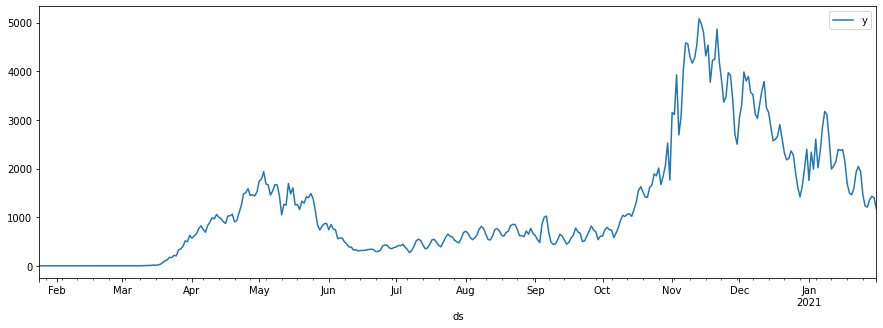

In [83]:
fb_df_case.plot(x='ds',y='y', figsize=(15,5))


In [84]:
len(fb_df_case)

374

In [85]:
train=fb_df_case[fb_df_case['ds']<'2020-10-01']
test=fb_df_case[(fb_df_case['ds']>='2020-10-01') & (fb_df_case['ds']<='2021-01-31') ]

In [86]:
test.head()

,ds,y
251,2020-10-01,612.333333
252,2020-10-02,740.000000
253,2020-10-03,793.000000
254,2020-10-04,743.000000
255,2020-10-05,736.666667


In [87]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
len(train)

251

In [89]:
len(test)

123

In [90]:
forecast = model.make_future_dataframe(periods=123)
forecast.tail(123)

,ds
251,2020-10-01
252,2020-10-02
253,2020-10-03
254,2020-10-04
255,2020-10-05
...,...
369,2021-01-27
370,2021-01-28
371,2021-01-29
372,2021-01-30


In [91]:
forecast = model.predict(forecast)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-24,-178.839274,-559.526114,272.070125,-178.839274,-178.839274,41.378422,41.378422,41.378422,41.378422,41.378422,41.378422,0.0,0.0,0.0,-137.460852
1,2020-01-25,-167.736835,-477.753561,285.470588,-167.736835,-167.736835,66.980080,66.980080,66.980080,66.980080,66.980080,66.980080,0.0,0.0,0.0,-100.756755
2,2020-01-26,-156.634397,-462.915156,279.833993,-156.634397,-156.634397,55.188002,55.188002,55.188002,55.188002,55.188002,55.188002,0.0,0.0,0.0,-101.446396
3,2020-01-27,-145.531959,-540.888336,242.398293,-145.531959,-145.531959,-22.992864,-22.992864,-22.992864,-22.992864,-22.992864,-22.992864,0.0,0.0,0.0,-168.524823
4,2020-01-28,-134.429521,-606.071836,243.936612,-134.429521,-134.429521,-56.197882,-56.197882,-56.197882,-56.197882,-56.197882,-56.197882,0.0,0.0,0.0,-190.627403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-01-27,157.851988,-386.624961,553.543540,-118.937588,410.733262,-61.364755,-61.364755,-61.364755,-61.364755,-61.364755,-61.364755,0.0,0.0,0.0,96.487233
370,2021-01-28,155.014584,-355.638939,579.783583,-124.380341,411.077259,-22.991002,-22.991002,-22.991002,-22.991002,-22.991002,-22.991002,0.0,0.0,0.0,132.023582
371,2021-01-29,152.177181,-325.908853,651.348928,-130.011665,410.382158,41.378422,41.378422,41.378422,41.378422,41.378422,41.378422,0.0,0.0,0.0,193.555602
372,2021-01-30,149.339777,-326.431887,743.517751,-136.168691,409.430949,66.980080,66.980080,66.980080,66.980080,66.980080,66.980080,0.0,0.0,0.0,216.319857


In [92]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(123)

,ds,yhat,yhat_lower,yhat_upper
251,2020-10-01,469.674619,48.880282,848.638887
252,2020-10-02,531.206639,146.749620,914.263366
253,2020-10-03,553.970894,159.647263,966.955560
254,2020-10-04,539.341412,151.616697,955.832552
255,2020-10-05,458.323142,55.407446,847.618745
...,...,...,...,...
369,2021-01-27,96.487233,-386.624961,553.543540
370,2021-01-28,132.023582,-355.638939,579.783583
371,2021-01-29,193.555602,-325.908853,651.348928
372,2021-01-30,216.319857,-326.431887,743.517751


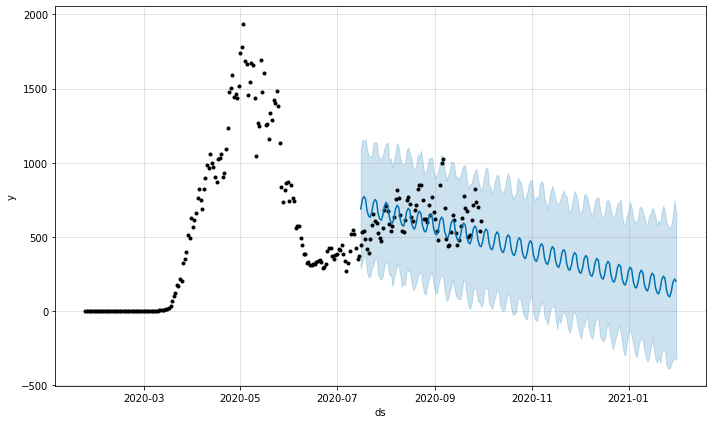

In [93]:
forecast['ds']=pd.to_datetime(forecast['ds'])
model.plot(forecast.tail(200));

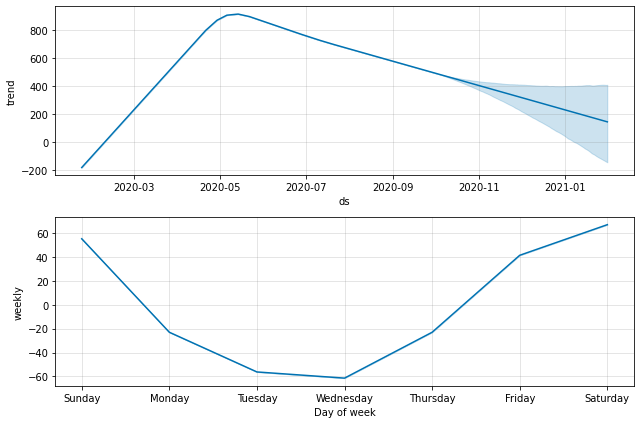

In [94]:
model.plot_components(forecast);

#### Exogenous 

In [119]:
fb_df_case=cook_averaged_case[cook_averaged_case['date']<='2021-01-31'][['date','case', 'lag_14_case','days_since_outbreak']]
fb_df_case.head()

,date,case,lag_14_case,days_since_outbreak
0,2020-01-24,1.000000,NaN,0
1,2020-01-25,0.500000,NaN,1
2,2020-01-26,0.333333,NaN,2
3,2020-01-27,0.000000,NaN,3
4,2020-01-28,0.000000,NaN,4


In [120]:
fb_df_case.columns=['ds','y','lag_14_case','days_since_outbreak']
fb_df_case['ds']=pd.to_datetime(fb_df_case['ds'])
fb_df_case.head()

,ds,y,lag_14_case,days_since_outbreak
0,2020-01-24,1.000000,NaN,0
1,2020-01-25,0.500000,NaN,1
2,2020-01-26,0.333333,NaN,2
3,2020-01-27,0.000000,NaN,3
4,2020-01-28,0.000000,NaN,4


In [121]:
fb_df_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   374 non-null    datetime64[ns]
 1   y                    374 non-null    float64       
 2   lag_14_case          360 non-null    float64       
 3   days_since_outbreak  374 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 14.6 KB


In [122]:
fb_df_case.tail(10)

,ds,y,lag_14_case,days_since_outbreak
364,2021-01-22,1923.000000,3172.333333,364
365,2021-01-23,2045.000000,3105.666667,365
366,2021-01-24,1936.333333,2595.000000,366
367,2021-01-25,1459.333333,1989.000000,367
368,2021-01-26,1231.666667,2056.000000,368
369,2021-01-27,1206.333333,2142.333333,369
370,2021-01-28,1360.333333,2395.666667,370
371,2021-01-29,1428.666667,2370.333333,371
372,2021-01-30,1398.666667,2389.333333,372
373,2021-01-31,1172.666667,2143.666667,373


In [123]:
train=fb_df_case[fb_df_case['ds']<'2020-10-01']
test=fb_df_case[(fb_df_case['ds']>='2020-10-01') & (fb_df_case['ds']<='2021-01-31') ]
train.dropna(inplace=True)
test.dropna(inplace=True)

In [124]:
model = Prophet()
model.add_regressor('lag_14_case')
model.add_regressor('days_since_outbreak')
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
len(test)

123

In [126]:
forecast = model.make_future_dataframe(periods=123)
forecast

,ds
0,2020-02-07
1,2020-02-08
2,2020-02-09
3,2020-02-10
4,2020-02-11
...,...
355,2021-01-27
356,2021-01-28
357,2021-01-29
358,2021-01-30


In [127]:
regressor=cook_averaged_case[cook_averaged_case['date']>='2020-02-08'][['date','lag_14_case','days_since_outbreak']]
regressor.columns=['ds','lag_14_case','days_since_outbreak']
regressor

,ds,lag_14_case,days_since_outbreak
15,2020-02-08,0.500000,15
16,2020-02-09,0.333333,16
17,2020-02-10,0.000000,17
18,2020-02-11,0.000000,18
19,2020-02-12,0.000000,19
...,...,...,...
383,2021-02-10,1206.333333,383
384,2021-02-11,1360.333333,384
385,2021-02-12,1428.666667,385
386,2021-02-13,1398.666667,386


In [128]:
forecast = model.make_future_dataframe(periods=123)
forecast=forecast.merge(regressor, how='inner',on='ds')
forecast

,ds,lag_14_case,days_since_outbreak
0,2020-02-08,0.500000,15
1,2020-02-09,0.333333,16
2,2020-02-10,0.000000,17
3,2020-02-11,0.000000,18
4,2020-02-12,0.000000,19
...,...,...,...
354,2021-01-27,2142.333333,369
355,2021-01-28,2395.666667,370
356,2021-01-29,2370.333333,371
357,2021-01-30,2389.333333,372


In [129]:
forecast = model.predict(forecast)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,days_since_outbreak,days_since_outbreak_lower,days_since_outbreak_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,lag_14_case,lag_14_case_lower,lag_14_case_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-08,595.641833,-282.162327,342.205718,595.641833,595.641833,-555.168061,-555.168061,-555.168061,-227.674814,-227.674814,-227.674814,-586.536591,-586.536591,-586.536591,-358.861776,-358.861776,-358.861776,31.368529,31.368529,31.368529,0.0,0.0,0.0,40.473772
1,2020-02-09,599.636462,-266.820891,368.649724,599.636462,599.636462,-560.758783,-560.758783,-560.758783,-225.728876,-225.728876,-225.728876,-584.695173,-584.695173,-584.695173,-358.966297,-358.966297,-358.966297,23.936390,23.936390,23.936390,0.0,0.0,0.0,38.877679
2,2020-02-10,603.631091,-324.228533,324.467492,603.631091,603.631091,-590.659362,-590.659362,-590.659362,-223.782937,-223.782937,-223.782937,-582.958277,-582.958277,-582.958277,-359.175340,-359.175340,-359.175340,-7.701085,-7.701085,-7.701085,0.0,0.0,0.0,12.971729
3,2020-02-11,607.625720,-313.584155,329.280732,607.625720,607.625720,-607.754258,-607.754258,-607.754258,-221.836998,-221.836998,-221.836998,-581.012338,-581.012338,-581.012338,-359.175340,-359.175340,-359.175340,-26.741920,-26.741920,-26.741920,0.0,0.0,0.0,-0.128539
4,2020-02-12,611.620348,-315.055657,339.533837,611.620348,611.620348,-606.114809,-606.114809,-606.114809,-219.891060,-219.891060,-219.891060,-579.066399,-579.066399,-579.066399,-359.175340,-359.175340,-359.175340,-27.048410,-27.048410,-27.048410,0.0,0.0,0.0,5.505539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2021-01-27,21.681346,1089.648177,1821.689402,-165.984585,187.729428,1418.477261,1418.477261,1418.477261,461.187444,461.187444,461.187444,1445.525671,1445.525671,1445.525671,984.338227,984.338227,984.338227,-27.048410,-27.048410,-27.048410,0.0,0.0,0.0,1440.158607
355,2021-01-28,19.119595,1248.731371,1995.027668,-169.980971,188.473809,1596.143247,1596.143247,1596.143247,463.133383,463.133383,463.133383,1606.343604,1606.343604,1606.343604,1143.210221,1143.210221,1143.210221,-10.200357,-10.200357,-10.200357,0.0,0.0,0.0,1615.262842
356,2021-01-29,16.557844,1244.991432,2014.825460,-174.764527,187.274148,1608.789196,1608.789196,1608.789196,465.079321,465.079321,465.079321,1592.402343,1592.402343,1592.402343,1127.323022,1127.323022,1127.323022,16.386853,16.386853,16.386853,0.0,0.0,0.0,1625.347040
357,2021-01-30,13.996093,1299.643328,2043.614858,-180.608589,186.400353,1637.632211,1637.632211,1637.632211,467.025260,467.025260,467.025260,1606.263681,1606.263681,1606.263681,1139.238421,1139.238421,1139.238421,31.368529,31.368529,31.368529,0.0,0.0,0.0,1651.628304


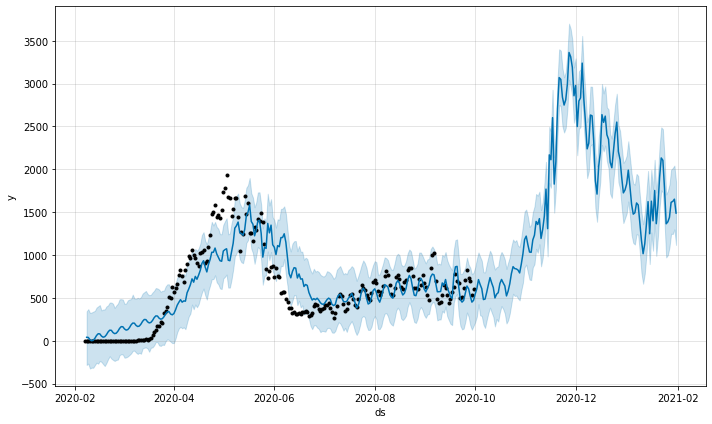

In [130]:
forecast['ds']=pd.to_datetime(forecast['ds'])
model.plot(forecast);

Errors


{'mae': 925.7258160685091,
 'mape': 0.339060805943289,
 'rmse': 1259.850437492729}

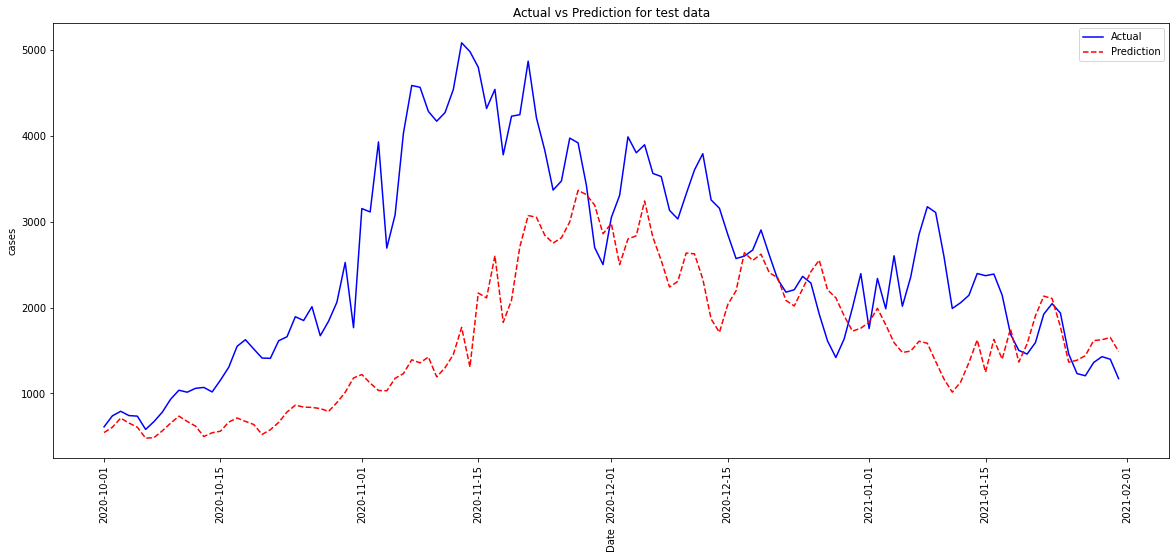

In [131]:
plt.figure(figsize=(20, 8))
plt.plot(test['ds'], test['y'], 'b-', label = 'Actual')
plt.plot(test['ds'], forecast.tail(123)['yhat'].values, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=forecast.tail(123)['yhat'].values,actual=test['y'].values)

##### Holidays and changepoints

###### Changepoints

In [132]:
#series of date
sdate = date(2020,2,8)   # start date
edate = date(2021,1,31)   # end date
dates=pd.date_range(sdate,edate-timedelta(days=1),freq='w')
dates

DatetimeIndex(['2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
               '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19',
               '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13',
               '2020-09-20', '2020-09-27', '2020-10-04', '2020-10-11',
               '2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08',
               '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03',
               '2021-01-10', '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', freq='W-SUN')

In [135]:
#Using holidays
model = Prophet(changepoints=[date for date in dates if date <test['ds'].values[0]],holidays=holidays_events,holidays_prior_scale=+7)
model.add_regressor('lag_14_case')
model.add_regressor('days_since_outbreak')
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Errors


{'mae': 910.0727075443475,
 'mape': 0.3347499569909959,
 'rmse': 1242.5864077893766}

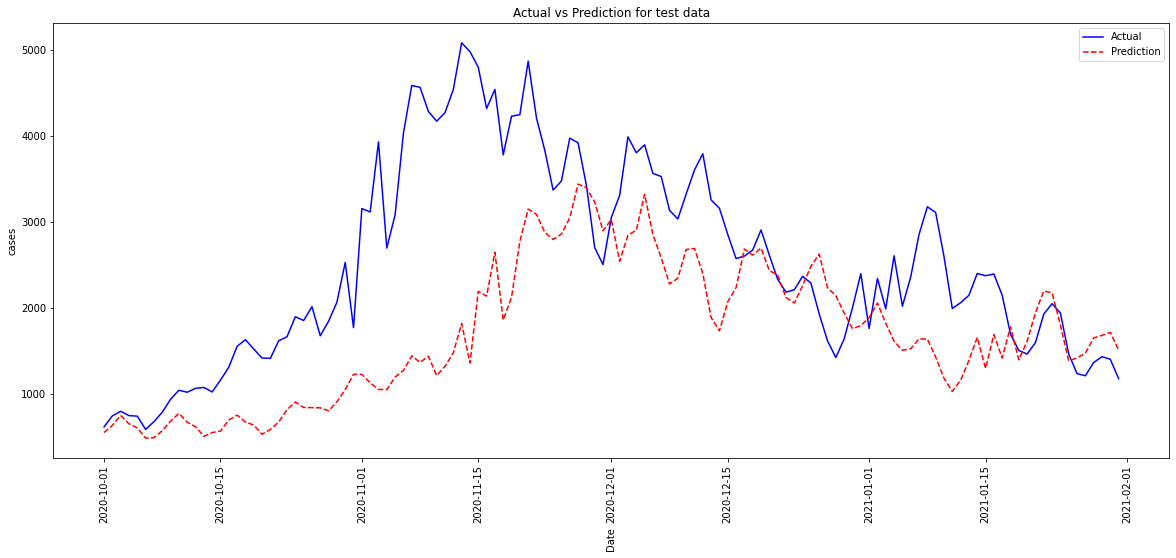

In [136]:
forecast = model.make_future_dataframe(periods=123)
regressor=cook_averaged_case[cook_averaged_case['date']>='2020-02-08'][['date','lag_14_case','days_since_outbreak']]
regressor.columns=['ds','lag_14_case','days_since_outbreak']
forecast = model.make_future_dataframe(periods=123)
forecast=forecast.merge(regressor, how='inner',on='ds')
forecast = model.predict(forecast)

plt.figure(figsize=(20, 8))
plt.plot(test['ds'], test['y'], 'b-', label = 'Actual')
plt.plot(test['ds'], forecast.tail(123)['yhat'].values, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=forecast.tail(123)['yhat'].values,actual=test['y'].values)

###### Holidays

In [137]:
dict_={'Christmas Day': '2020-12-25 00:00:00',
 'Columbus Day': '2020-10-12 00:00:00',
 'Easter': '2020-04-12 00:00:00',
 'Halloween': '2020-10-31 00:00:00',
 'Independence Day': '2020-07-04 00:00:00',
 'Labor Day': '2020-09-07 00:00:00',
 'Martin Luther King Jr Day': '2020-01-20 00:00:00',
 'Memorial Day': '2020-05-25 00:00:00',
 'New Year’s Day': '2020-01-01 00:00:00',
 'President’s Day': '2020-02-17 00:00:00',
 'Thanksgiving': '2020-11-26 00:00:00',
 "Veterans' Day": '2020-11-11 00:00:00',
 'BLM Rallies': '2020-05-30 00:00:00',
 'Federal Travel Ban: Brazil': '2020-05-29 00:00:00',
 'Federal Travel Ban: China': '2020-02-02 00:00:00',
 'Federal Travel Ban: Europe': '2020-03-13 00:00:00',
 'Federal Travel Ban: UK, Ireland': '2020-03-14 00:00:00',
  'Stay at home ended': '2020-05-29 00:00:00',
 'Stay at home order': '2020-03-21 00:00:00'}

In [138]:
keys_=dict_.keys()
values_=dict_.values()


In [139]:
holidays_events=pd.DataFrame(list(zip(keys_,values_)),columns=['holiday','ds'])
holidays_events['ds']=pd.to_datetime(holidays_events['ds'])
holidays_events

,holiday,ds
0,Christmas Day,2020-12-25
1,Columbus Day,2020-10-12
2,Easter,2020-04-12
3,Halloween,2020-10-31
4,Independence Day,2020-07-04
5,Labor Day,2020-09-07
6,Martin Luther King Jr Day,2020-01-20
7,Memorial Day,2020-05-25
8,New Year’s Day,2020-01-01
9,President’s Day,2020-02-17


In [140]:
model = Prophet(changepoints=[date for date in dates if date <test['ds'].values[0]],holidays=holidays_events,holidays_prior_scale=+7)
model.add_regressor('lag_14_case')
model.add_regressor('days_since_outbreak')
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Errors


{'mae': 841.0499493875134,
 'mape': 0.3211443601514722,
 'rmse': 1154.0533423650847}

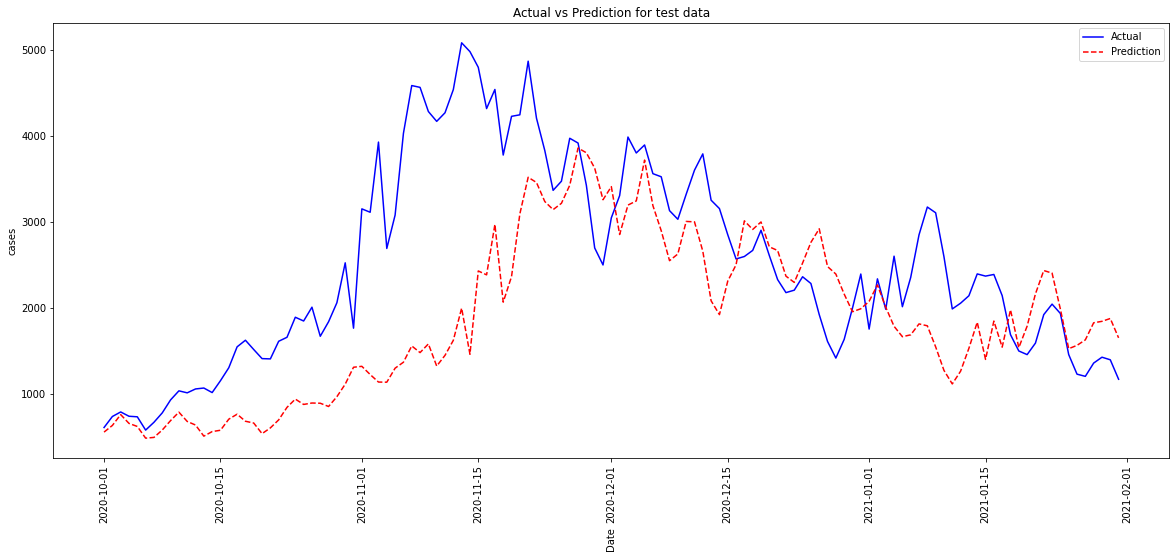

In [142]:
forecast = model.make_future_dataframe(periods=123)
regressor=cook_averaged_case[cook_averaged_case['date']>='2020-02-08'][['date','lag_14_case','days_since_outbreak']]
regressor.columns=['ds','lag_14_case','days_since_outbreak']
forecast = model.make_future_dataframe(periods=123)
forecast=forecast.merge(regressor, how='inner',on='ds')
forecast = model.predict(forecast)

plt.figure(figsize=(20, 8))
plt.plot(test['ds'], test['y'], 'b-', label = 'Actual')
plt.plot(test['ds'], forecast.tail(123)['yhat'].values, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=forecast.tail(123)['yhat'].values,actual=test['y'].values)

##### Short-term forecasting

In [156]:
fb_df_case=cook_averaged_case[cook_averaged_case['date']<='2021-01-31'][['date','case', 'lag_14_case','days_since_outbreak']]
fb_df_case.columns=['ds','y','lag_14_case','days_since_outbreak']
fb_df_case['ds']=pd.to_datetime(fb_df_case['ds'])
fb_df_case.head()

,ds,y,lag_14_case,days_since_outbreak
0,2020-01-24,1.000000,NaN,0
1,2020-01-25,0.500000,NaN,1
2,2020-01-26,0.333333,NaN,2
3,2020-01-27,0.000000,NaN,3
4,2020-01-28,0.000000,NaN,4


Errors


{'mae': 1039.9380685436279,
 'mape': 0.43744121549856757,
 'rmse': 1262.4482762491994}

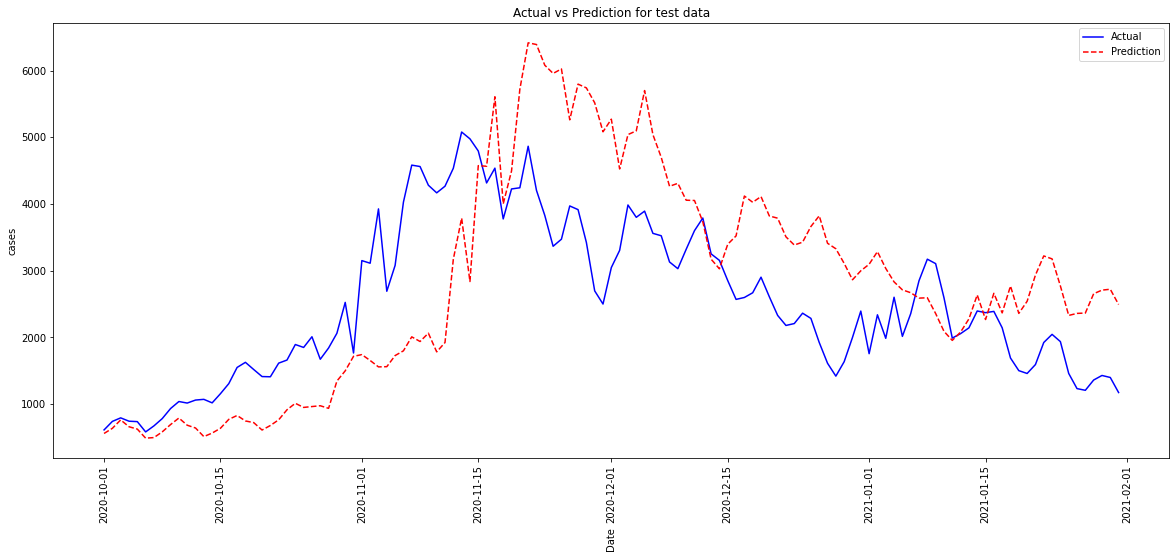

In [ ]:
fb_df_case['ds'] = pd.to_datetime(fb_df_case['ds'])
fb_df_case=fb_df_case[fb_df_case['ds']<='2021-01-31']

starting_date='2020-10-01'
ending_date='2021-01-31'
prediction=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=fb_df_case[fb_df_case["ds"]<starting_date]
  test=fb_df_case[(fb_df_case["ds"]>=starting_date) & (fb_df_case["ds"]<pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  train.dropna(inplace=True)
  test.dropna(inplace=True)




  model = Prophet(changepoints=[date for date in dates if date <test['ds'].values[0]],holidays=holidays_events,holidays_prior_scale=+7)
  model.add_regressor('lag_14_case')
  model.add_regressor('days_since_outbreak')
  model.fit(train)

  regressor=cook_averaged_case[cook_averaged_case['date']>=train['ds'].values[0]][['date','lag_14_case','days_since_outbreak']]
  regressor.columns=['ds','lag_14_case','days_since_outbreak']

  forecast = model.make_future_dataframe(periods=len(test))
  forecast=forecast.merge(regressor, how='inner',on='ds')
  forecast = model.predict(forecast)
  prophet_pred=forecast[['yhat']].tail(len(test)).values




  prediction.append(prophet_pred)
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


Predictions=[]
for i in range(len(prediction)):
  for j in range(len(prediction[i])):
    Predictions.append(prediction[i][j])


train=fb_df_case[fb_df_case['ds']<'2020-10-01']
test=fb_df_case[(fb_df_case['ds']>='2020-10-01') & (fb_df_case['ds']<='2021-01-31') ]

plt.figure(figsize=(20, 8))
plt.plot(test['ds'], test['y'], 'b-', label = 'Actual')
plt.plot(test['ds'], Predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(Predictions,actual=test['y'].values)


### XgBoost

In [160]:
cook=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_including_lag.csv')
cook['date']=pd.to_datetime(cook['date'])


cook_averaged=cook.drop(['public_holiday','gatherings'], axis=1).copy()

df_case=cook_averaged.drop(['death','lag_14_death'],axis=1)

df_case

,date,case,avg.temp,pop_stay_at_home,air_traffic,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,31.5,1096712.0,3545834.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,34.5,1212883.0,3545834.0,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,31.0,1300363.0,3545834.0,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,29.5,1126001.0,3545834.0,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,31.5,1117075.0,3545834.0,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2021-02-10,NaN,NaN,NaN,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,1206.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
384,2021-02-11,NaN,NaN,NaN,NaN,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,1360.333333,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
385,2021-02-12,NaN,NaN,NaN,NaN,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,1428.666667,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0
386,2021-02-13,NaN,NaN,NaN,NaN,0,0,0,1,1,1,386,260,159,105,79,50,2021,2,13,0,1,0,0,0,0,1398.666667,23.5,1467123.0,1.044186e+06,372.0,246.0,145.0,91.0,65.0,36.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0


In [161]:
train=df_case[df_case['date']<'2020-10-01']
test=df_case[(df_case['date']>='2020-10-01') & (df_case['date']<='2021-01-31') ]
forecast=df_case[df_case['date']>='2021-02-01']

In [ ]:
X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

In [ ]:
X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]

[20:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


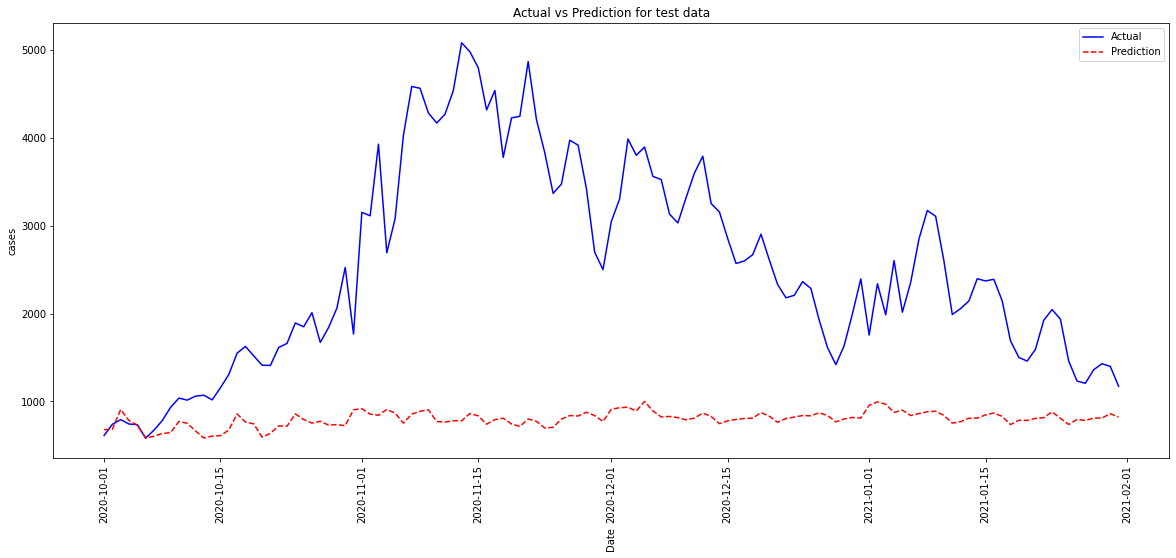

In [ ]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

#Errors
errors(prediction=xgb_pred,actual=y_test['case'])

#Visualization
plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], xgb_pred, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()


#### Short-term forecasting

In [ ]:
df_case.drop(['pop_stay_at_home', 'air_traffic'],axis=1,inplace=True)

In [ ]:
df_case.columns

Index(['date', 'case', 'avg.temp', 'holiday_surge_cases', 'stay_home_order',
       'BLM_Protest', 'travel_ban_china', 'travel_ban_Europe',
       'travel_ban_Brazil', 'days_since_outbreak', 'days_since_BLM_Protest',
       'days_since_Labor Day', 'days_since_Halloween',
       'days_since_Thanksgiving', 'days_since_Christmas Day', 'Year', 'Month',
       'Day', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'lag_14_case', 'lag_14_avg.temp',
       'lag_14_pop_stay_at_home', 'lag_14_air_traffic',
       'lag_14_days_since_outbreak', 'lag_14_days_since_BLM_Protest',
       'lag_14_days_since_Labor Day', 'lag_14_days_since_Halloween',
       'lag_14_days_since_Thanksgiving', 'lag_14_days_since_Christmas Day',
       'lag_14_Day', 'lag_14_holiday_surge_cases', 'lag_14_stay_home_order',
       'lag_14_BLM_Protest', 'lag_14_travel_ban_china',
       'lag_14_travel_ban_Europe', 'lag_14_travel_ban_Brazil'],
      dtype='object')

[20:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'mae': 592.008252753586,
 'mape': 0.2396006974420171,
 'rmse': 869.3964001233176}

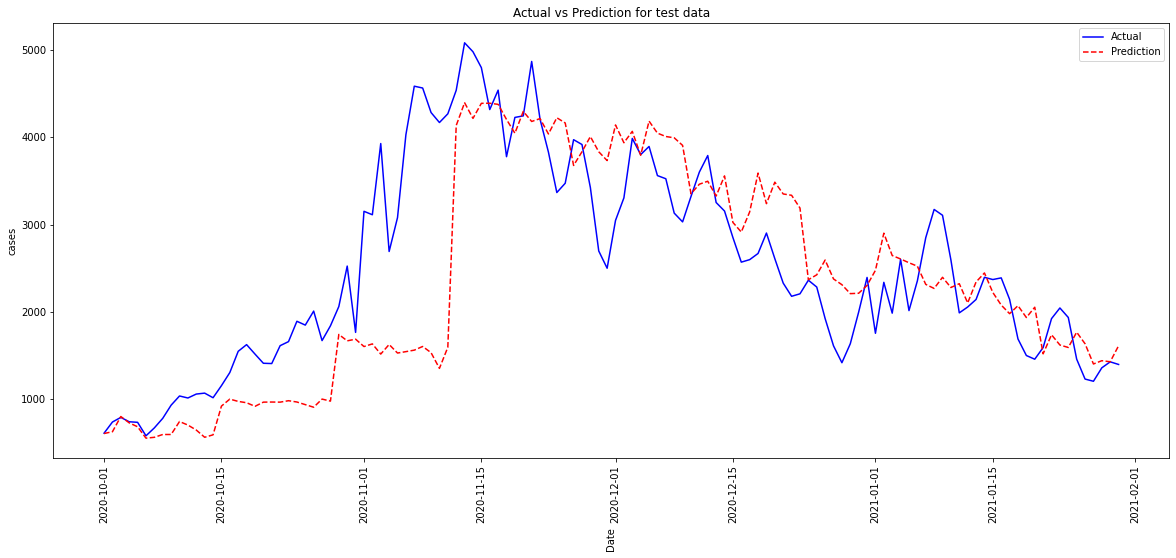

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']

starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  xgb = XGBRegressor(n_estimators=100)
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=y_test['case'])


In [ ]:
#Feature importance xgb
feature_importances_xgb=xgb.feature_importances_
features= X_train.columns
feature_importances_xgb=pd.DataFrame(list(zip(features,feature_importances_xgb)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_xgb.head(10)

,features,importance
7,days_since_outbreak,0.555928
34,lag_14_stay_home_order,0.142941
1,holiday_surge_cases,0.055077
2,stay_home_order,0.050884
22,lag_14_case,0.050137
14,Month,0.044504
23,lag_14_avg.temp,0.034027
24,lag_14_pop_stay_at_home,0.018478
0,avg.temp,0.009249
17,Saturday,0.007964


In [ ]:
feature_importances_xgb[feature_importances_xgb['importance']<=0] ['features'].values

array(['Year', 'lag_14_days_since_Halloween', 'lag_14_travel_ban_Europe',
       'lag_14_travel_ban_china', 'BLM_Protest',
       'lag_14_holiday_surge_cases', 'travel_ban_china',
       'lag_14_days_since_Christmas Day',
       'lag_14_days_since_Thanksgiving', 'lag_14_days_since_outbreak',
       'lag_14_days_since_Labor Day', 'lag_14_days_since_BLM_Protest',
       'days_since_Christmas Day', 'travel_ban_Europe',
       'days_since_BLM_Protest', 'days_since_Labor Day',
       'days_since_Halloween', 'Sunday', 'days_since_Thanksgiving',
       'lag_14_travel_ban_Brazil'], dtype=object)

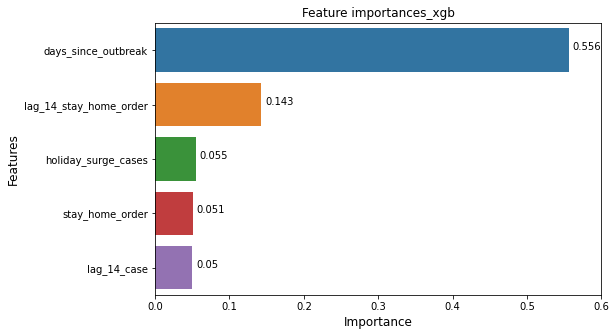

In [ ]:
plt.figure(figsize=(8,5))
ax=sns.barplot(y="features", x="importance", data=feature_importances_xgb.head(5), orient='h')
ax.set_xlabel('Importance', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_xlim([0,0.6])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.005
        y = p.get_y() + p.get_height()*0.5
        ax.annotate(round(p.get_width(),3), (x, y))

_=ax.set_title('Feature importances_xgb', fontsize=12)

In [ ]:
df_case=df_case.drop(feature_importances_xgb[feature_importances_xgb['importance']<=0] ['features'].values, axis=1)

[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'mae': 591.8246953578594,
 'mape': 0.2385574262098798,
 'rmse': 870.1209520597546}

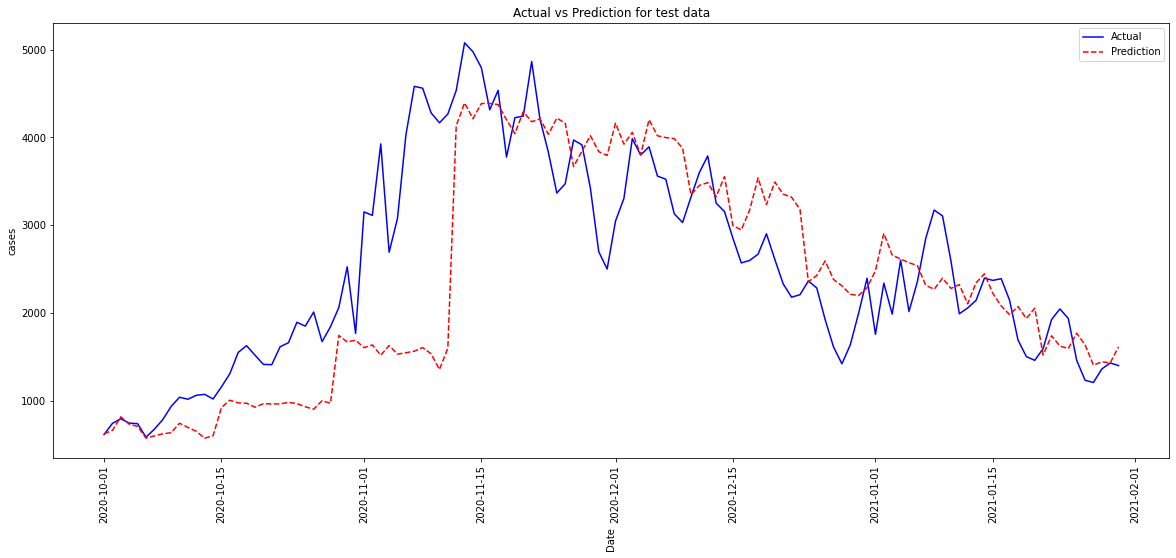

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']
df_case=df_case.dropna()

starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)


  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  xgb = XGBRegressor(n_estimators=100)
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=y_test['case'])


In [ ]:
#Feature importance xgb
feature_importances_xgb=xgb.feature_importances_
features= X_train.columns
feature_importances_xgb=pd.DataFrame(list(zip(features,feature_importances_xgb)), columns=['features','importance']).sort_values('importance', ascending=False)

feature_importances_xgb.tail(10)

,features,importance
8,Saturday,0.007964
6,Day,0.007386
11,Wednesday,0.005036
16,lag_14_Day,0.003829
9,Thursday,0.002862
7,Monday,0.002717
10,Tuesday,0.002664
18,lag_14_BLM_Protest,0.002393
3,travel_ban_Brazil,0.001968
15,lag_14_air_traffic,0.001958


##### Hyperparameter tuning

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']


starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]
best_parameters=[]
best_score=[]


while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  #XGBoost hyper-parameter tuning

  param_tuning = {
        'learning_rate': [0.01, 0.1,0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
  }

  xgb_model = XGBRegressor()

  #mape= mape=np.mean(np.abs(prediction-actual)/np.abs(actual))

  gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

  gsearch.fit(X_train,y_train)

  best_parameters.append(gsearch.best_params_)
  best_score.append(gsearch.best_score_)

  xgb = XGBRegressor(n_estimators=gsearch.best_params_['n_estimators'],subsample=gsearch.best_params_['subsample'],colsample_bytree=gsearch.best_params_['colsample_bytree'],learning_rate=gsearch.best_params_['learning_rate'],max_depth=gsearch.best_params_['max_depth'], min_child_weight=gsearch.best_params_['min_child_weight'])
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)



  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=y_test['case'])


Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3572 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[02:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.3min finished


[02:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 1010 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1710 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2610 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3598 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[02:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3538 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.8min finished


[03:02:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3536 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.0min finished


[03:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3462 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  7.3min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.3min finished


[03:17:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3420 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[03:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1456 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3312 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4304 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.8min finished


[03:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:  1.7min


In [ ]:
best_parameters

[{'colsample_bytree': 0.5,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 5,
  'n_estimators': 500,
  'objective': 'reg:squarederror',
  'subsample': 0.5},
 {'colsample_bytree': 0.5,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 3,
  'n_estimators': 500,
  'objective': 'reg:squarederror',
  'subsample': 0.7},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.5,
  'max_depth': 10,
  'min_child_weight': 5,
  'n_estimators': 100,
  'objective': 'reg:squarederror',
  'subsample': 0.5},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 3,
  'n_estimators': 500,
  'objective': 'reg:squarederror',
  'subsample': 0.5},
 {'colsample_bytree': 0.7,
  'learning_rate': 0.5,
  'max_depth': 3,
  'min_child_weight': 3,
  'n_estimators': 100,
  'objective': 'reg:squarederror',
  'subsample': 0.7},
 {'colsample_bytree': 0.5,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 3,
  'n_estimators': 200,
  'objective': 'r

In [ ]:
best_score

[-33860.003310218555,
 -45369.70065991304,
 -92501.13707661052,
 -402715.6579362527,
 -564098.2100711241,
 -98312.75080995956,
 -255671.4069221003,
 -360667.03902061924,
 -207490.16806588083]

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3572 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.6min finished


[16:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.8min finished


[16:30:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3690 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  6.2min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.2min finished


[16:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1110 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1810 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2710 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3600 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.6min finished


[16:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3536 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[16:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.9min finished


[16:56:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3534 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.1min finished


[17:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1714 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3506 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.4min finished


[17:11:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2794 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3674 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.4min finished


[17:18:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Errors


{'mae': 569.1796619853034,
 'mape': 0.23398583334859197,
 'rmse': 838.7765096530607,
 'smape': 0.26355142716632574}

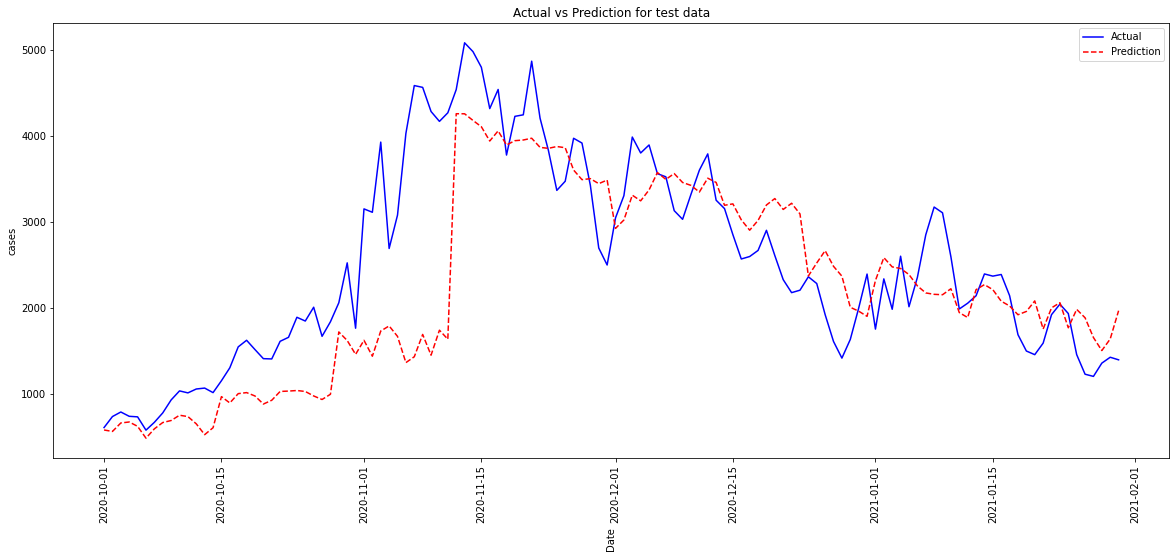

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']


starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]
best_parameters=[]
best_score=[]


while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  #XGBoost hyper-parameter tuning

  param_tuning = {
        'learning_rate': [0.01, 0.1,0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
  }

  xgb_model = XGBRegressor()

  #mape= mape=np.mean(np.abs(prediction-actual)/np.abs(actual))

  gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

  gsearch.fit(X_train,y_train)

  best_parameters.append(gsearch.best_params_)
  best_score.append(gsearch.best_score_)

  xgb = XGBRegressor(n_estimators=gsearch.best_params_['n_estimators'],subsample=gsearch.best_params_['subsample'],colsample_bytree=gsearch.best_params_['colsample_bytree'],learning_rate=gsearch.best_params_['learning_rate'],max_depth=gsearch.best_params_['max_depth'], min_child_weight=gsearch.best_params_['min_child_weight'])
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)



  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=y_test['case'])


### LGBM


Errors


{'mae': 2230.4224377191426,
 'mape': 0.8645768490647971,
 'rmse': 2487.3903665337766,
 'smape': 1.533725442967613}

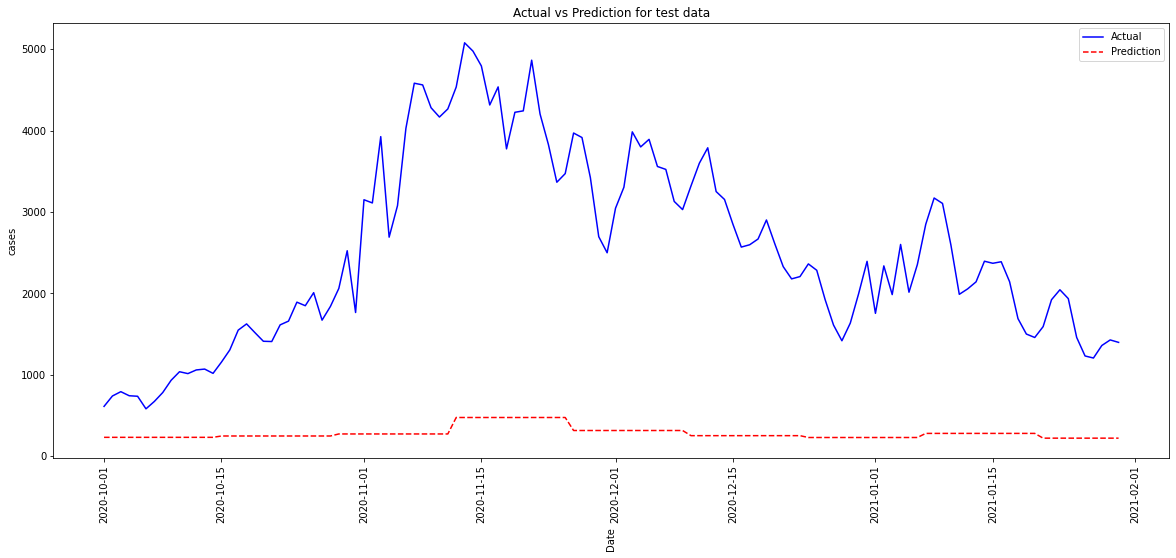

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']
df_case=df_case.dropna()

starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  params = {
    'objective': 'regression',
    'metric': 'mape',
    'boosting': 'gbdt',
    'learning_rate': 0.06,
    'num_leaves': 64,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.9 }

  train = lgb.Dataset(X_train, y_train)
  model = lgb.train(params, train, num_boost_round=500)
  lgb_pred = model.predict(y_test)
  pred.append(lgb_pred)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=y_test['case'])


### RF

Errors


{'mae': 644.2522131147545,
 'mape': 0.26430880133802465,
 'rmse': 919.5166460713348,
 'smape': 0.28745061299100677}

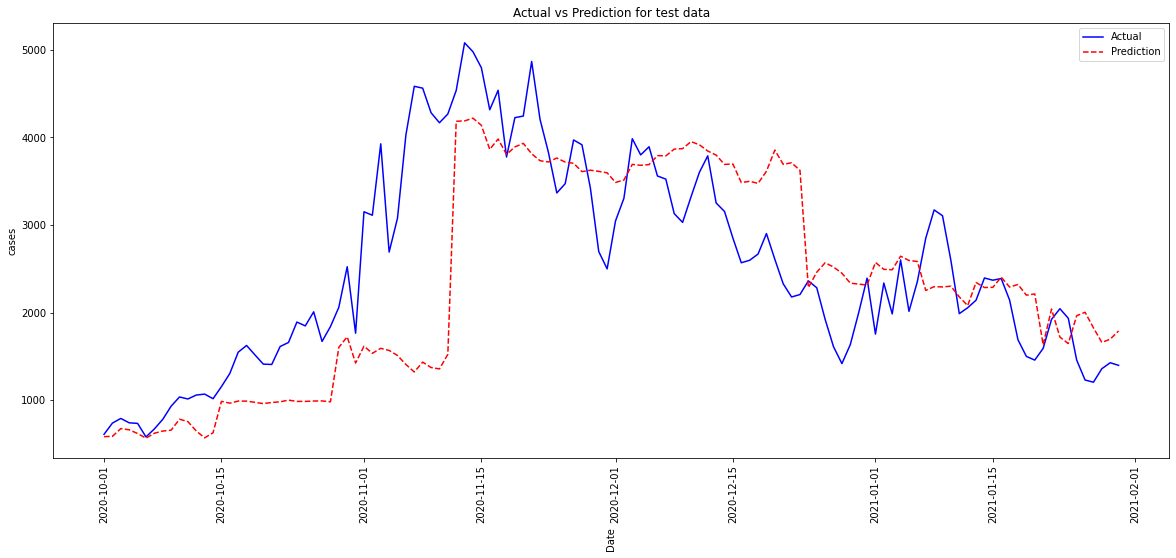

In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-30']
df_case=df_case.dropna()

starting_date='2020-09-30'
ending_date='2021-01-30'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  rf= RandomForestRegressor(n_estimators=100)
  rf.fit(X_train,y_train)
  rf_pred = rf.predict(X_test)

  pred.append(rf_pred)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])



train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=predictions,actual=y_test['case'])


## Best Model and Future Forecast

In [162]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_including_lag.csv')
df['date']=pd.to_datetime(df['date'])
df

,date,case,death,avg.temp,pop_stay_at_home,air_traffic,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_death,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,0.0,31.5,1096712.0,3545834.0,No,No,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,0.0,34.5,1212883.0,3545834.0,No,No,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,0.0,31.0,1300363.0,3545834.0,No,No,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,0.0,29.5,1126001.0,3545834.0,No,No,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,0.0,31.5,1117075.0,3545834.0,No,No,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2021-02-10,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,1206.333333,20.666667,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
384,2021-02-11,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,1360.333333,31.666667,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
385,2021-02-12,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,1428.666667,31.333333,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0
386,2021-02-13,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,386,260,159,105,79,50,2021,2,13,0,1,0,0,0,0,1398.666667,23.000000,23.5,1467123.0,1.044186e+06,372.0,246.0,145.0,91.0,65.0,36.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0


In [163]:
df_case=df.drop(['public_holiday','gatherings','death','lag_14_death','avg.temp','pop_stay_at_home', 'air_traffic'], axis=1)
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             388 non-null    datetime64[ns]
 1   case                             374 non-null    float64       
 2   holiday_surge_cases              388 non-null    int64         
 3   stay_home_order                  388 non-null    int64         
 4   BLM_Protest                      388 non-null    int64         
 5   travel_ban_china                 388 non-null    int64         
 6   travel_ban_Europe                388 non-null    int64         
 7   travel_ban_Brazil                388 non-null    int64         
 8   days_since_outbreak              388 non-null    int64         
 9   days_since_BLM_Protest           388 non-null    int64         
 10  days_since_Labor Day             388 non-null    int64        

In [164]:
train=df_case[df_case['date']<'2020-10-01'].set_index('date')
test=df_case[(df_case['date']>='2020-10-01') & (df_case['date']<='2021-01-31') ].set_index('date')
forecast=df_case[df_case['date']>='2021-02-01'].set_index('date')

##### SARIMAX

In [165]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-31']

starting_date='2020-10-01'
ending_date='2021-01-31'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<starting_date]
  test=df_case[(df_case["date"]>=starting_date) & (df_case["date"]<pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  train.set_index('date', inplace=True)
  test.set_index('date', inplace=True)

  
  model = SARIMAX(train['case'], order=(3,1,4), trend='c')
  results=model.fit()

  #predict on test data
  start=len(train)
  end=len(train)+len(test)-1
  pred_sarimax=results.predict(start,end,typ='levels')


  pred.append(pred_sarimax)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])

pred_sarimax=predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_r

Errors


{'mae': 545.6441437506406,
 'mape': 0.2269523038606167,
 'rmse': 756.9312367557453}

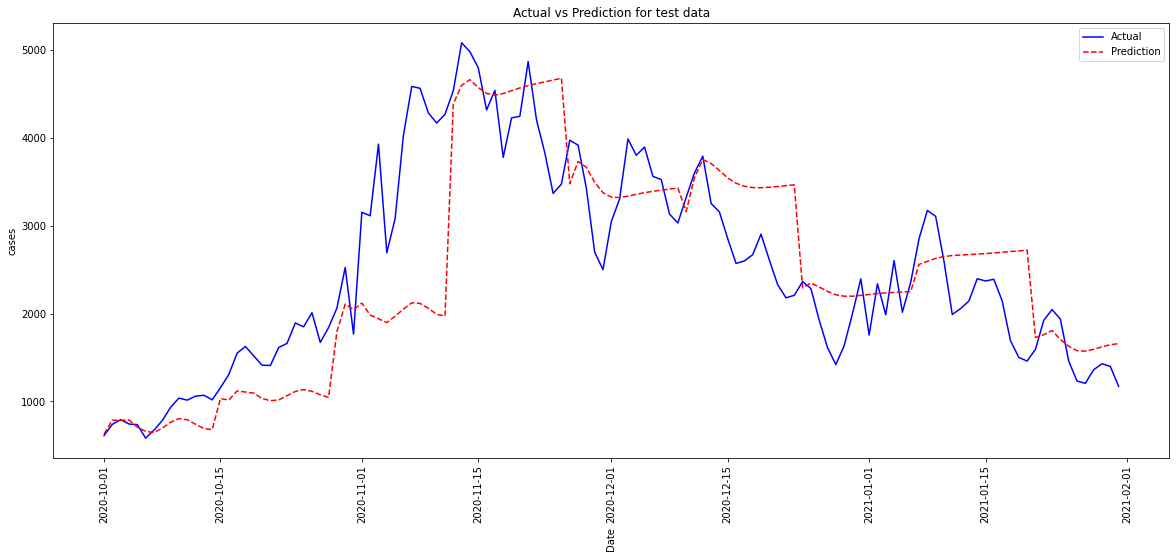

In [166]:
train=df_case[df_case["date"]<"2020-10-01"]
test=df_case[(df_case["date"]>="2020-10-01")]

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], pred_sarimax, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()


print('Errors')
errors(prediction=pred_sarimax,actual=test['case'])


##### PROPHET

In [168]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_including_lag.csv')
df['date']=pd.to_datetime(df['date'])
df_case=df.drop(['public_holiday','gatherings','death','lag_14_death'], axis=1)
df_case

,date,case,avg.temp,pop_stay_at_home,air_traffic,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,31.5,1096712.0,3545834.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,34.5,1212883.0,3545834.0,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,31.0,1300363.0,3545834.0,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,29.5,1126001.0,3545834.0,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,31.5,1117075.0,3545834.0,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2021-02-10,NaN,NaN,NaN,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,1206.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
384,2021-02-11,NaN,NaN,NaN,NaN,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,1360.333333,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
385,2021-02-12,NaN,NaN,NaN,NaN,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,1428.666667,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0
386,2021-02-13,NaN,NaN,NaN,NaN,0,0,0,1,1,1,386,260,159,105,79,50,2021,2,13,0,1,0,0,0,0,1398.666667,23.5,1467123.0,1.044186e+06,372.0,246.0,145.0,91.0,65.0,36.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0


In [169]:
#series of date
sdate = date(2020,2,8)   # start date
edate = date(2021,1,31)   # end date
dates=pd.date_range(sdate,edate-timedelta(days=1),freq='w')
dates

DatetimeIndex(['2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
               '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19',
               '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13',
               '2020-09-20', '2020-09-27', '2020-10-04', '2020-10-11',
               '2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08',
               '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03',
               '2021-01-10', '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', freq='W-SUN')

In [170]:
dict_={'Christmas Day': '2020-12-25 00:00:00',
 'Columbus Day': '2020-10-12 00:00:00',
 'Easter': '2020-04-12 00:00:00',
 'Halloween': '2020-10-31 00:00:00',
 'Independence Day': '2020-07-04 00:00:00',
 'Labor Day': '2020-09-07 00:00:00',
 'Martin Luther King Jr Day': '2020-01-20 00:00:00',
 'Memorial Day': '2020-05-25 00:00:00',
 'New Year’s Day': '2020-01-01 00:00:00',
 'President’s Day': '2020-02-17 00:00:00',
 'Thanksgiving': '2020-11-26 00:00:00',
 "Veterans' Day": '2020-11-11 00:00:00',
 'BLM Rallies': '2020-05-30 00:00:00',
 'Federal Travel Ban: Brazil': '2020-05-29 00:00:00',
 'Federal Travel Ban: China': '2020-02-02 00:00:00',
 'Federal Travel Ban: Europe': '2020-03-13 00:00:00',
 'Federal Travel Ban: UK, Ireland': '2020-03-14 00:00:00',
  'Stay at home ended': '2020-05-29 00:00:00',
 'Stay at home order': '2020-03-21 00:00:00'}

In [171]:
keys_=dict_.keys()
values_=dict_.values()


In [172]:
holidays_events=pd.DataFrame(list(zip(keys_,values_)),columns=['holiday','ds'])
holidays_events['ds']=pd.to_datetime(holidays_events['ds'])
holidays_events

,holiday,ds
0,Christmas Day,2020-12-25
1,Columbus Day,2020-10-12
2,Easter,2020-04-12
3,Halloween,2020-10-31
4,Independence Day,2020-07-04
5,Labor Day,2020-09-07
6,Martin Luther King Jr Day,2020-01-20
7,Memorial Day,2020-05-25
8,New Year’s Day,2020-01-01
9,President’s Day,2020-02-17


Errors


{'mae': 1078.3291930741264,
 'mape': 0.441815864978434,
 'rmse': 1283.3677385070475}

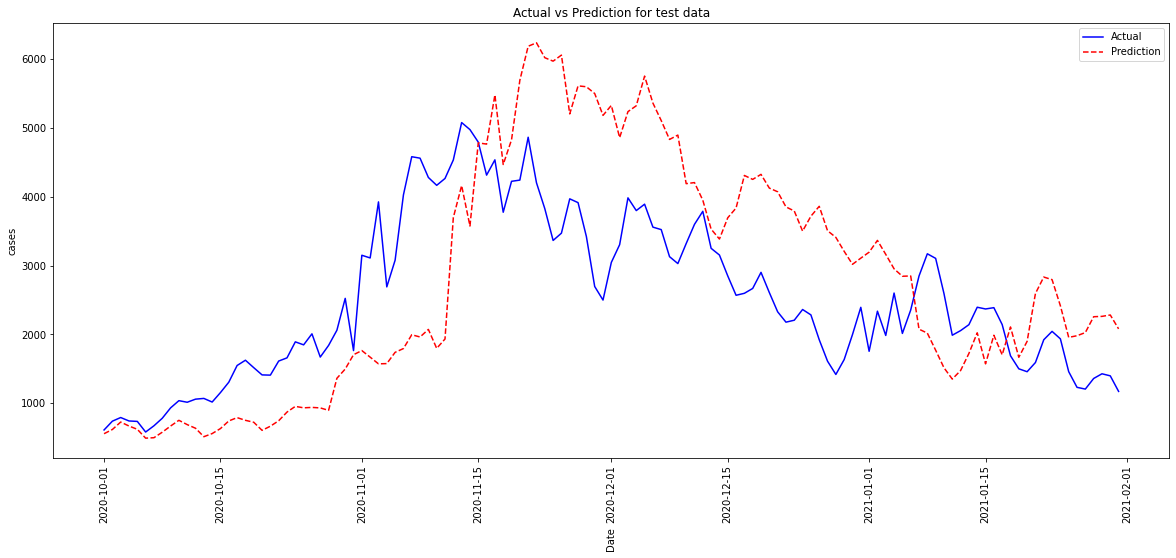

In [ ]:
fb_df_case['ds'] = pd.to_datetime(fb_df_case['ds'])
fb_df_case=fb_df_case[fb_df_case['ds']<='2021-01-31']

starting_date='2020-10-01'
ending_date='2021-01-31'
prediction=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=fb_df_case[fb_df_case["ds"]<starting_date]
  test=fb_df_case[(fb_df_case["ds"]>=starting_date) & (fb_df_case["ds"]<pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  train.dropna(inplace=True)
  test.dropna(inplace=True)




  model = Prophet(changepoints=[date for date in dates if date <test['ds'].values[0]],holidays=holidays_events,holidays_prior_scale=+7)
  model.add_regressor('lag_14_case')
  model.add_regressor('days_since_outbreak')
  model.fit(train)

  regressor=cook_averaged_case[cook_averaged_case['date']>=train['ds'].values[0]][['date','lag_14_case','days_since_outbreak']]
  regressor.columns=['ds','lag_14_case','days_since_outbreak']

  forecast = model.make_future_dataframe(periods=len(test))
  forecast=forecast.merge(regressor, how='inner',on='ds')
  forecast = model.predict(forecast)
  prophet_pred=forecast[['yhat']].tail(len(test)).values




  prediction.append(prophet_pred)
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


Predictions=[]
for i in range(len(prediction)):
  for j in range(len(prediction[i])):
    Predictions.append(prediction[i][j])


train=fb_df_case[fb_df_case['ds']<'2020-10-01']
test=fb_df_case[(fb_df_case['ds']>='2020-10-01') & (fb_df_case['ds']<='2021-01-31') ]

plt.figure(figsize=(20, 8))
plt.plot(test['ds'], test['y'], 'b-', label = 'Actual')
plt.plot(test['ds'], Predictions, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(Predictions,actual=test['y'].values)

#### XgBoost

In [ ]:
df_case.head()

,date,case,avg.temp,pop_stay_at_home,air_traffic,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-24,1.000000,31.5,1096712.0,3545834.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-25,0.500000,34.5,1212883.0,3545834.0,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-26,0.333333,31.0,1300363.0,3545834.0,0,0,0,0,0,0,2,0,0,0,0,0,2020,1,26,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-27,0.000000,29.5,1126001.0,3545834.0,0,0,0,0,0,0,3,0,0,0,0,0,2020,1,27,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-28,0.000000,31.5,1117075.0,3545834.0,0,0,0,0,0,0,4,0,0,0,0,0,2020,1,28,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-31']

starting_date='2020-09-30'
ending_date='2021-01-31'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  xgb = XGBRegressor(n_estimators=100)
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


#Feature importance xgb
feature_importances_xgb=xgb.feature_importances_
features= X_train.columns
feature_importances_xgb=pd.DataFrame(list(zip(features,feature_importances_xgb)), columns=['features','importance']).sort_values('importance', ascending=False)

df_case=df_case.drop(feature_importances_xgb[feature_importances_xgb['importance']<=0] ['features'].values, axis=1)


df_case['date'] = pd.to_datetime(df_case['date'])
df_case=df_case[df_case['date']<='2021-01-31']


starting_date='2020-09-30'
ending_date='2021-01-31'
pred=[]
best_parameters=[]
best_score=[]


while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<=starting_date]
  test=df_case[(df_case["date"]>starting_date) & (df_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  #XGBoost hyper-parameter tuning

  param_tuning = {
        'learning_rate': [0.01, 0.1,0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
  }

  xgb_model = XGBRegressor()

  #mape= mape=np.mean(np.abs(prediction-actual)/np.abs(actual))

  gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

  gsearch.fit(X_train,y_train)

  best_parameters.append(gsearch.best_params_)
  best_score.append(gsearch.best_score_)

  xgb = XGBRegressor(n_estimators=gsearch.best_params_['n_estimators'],subsample=gsearch.best_params_['subsample'],colsample_bytree=gsearch.best_params_['colsample_bytree'],learning_rate=gsearch.best_params_['learning_rate'],max_depth=gsearch.best_params_['max_depth'], min_child_weight=gsearch.best_params_['min_child_weight'])
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)



  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])


pred_xgboost=predictions

[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3530 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[16:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2628 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3606 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.7min finished


[16:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3454 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  7.1min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.1min finished


[16:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2610 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  7.4min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.4min finished


[16:53:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1404 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3322 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  7.6min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[17:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2286 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3250 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4238 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  7.9min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.9min finished


[17:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 762 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4032 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  8.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[17:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2172 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2956 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3940 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  8.4min finished


[17:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2310 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3092 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  8.7min finished


[17:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Errors


{'mae': 597.0426371918138,
 'mape': 0.2477726143259211,
 'rmse': 876.4665221507569}

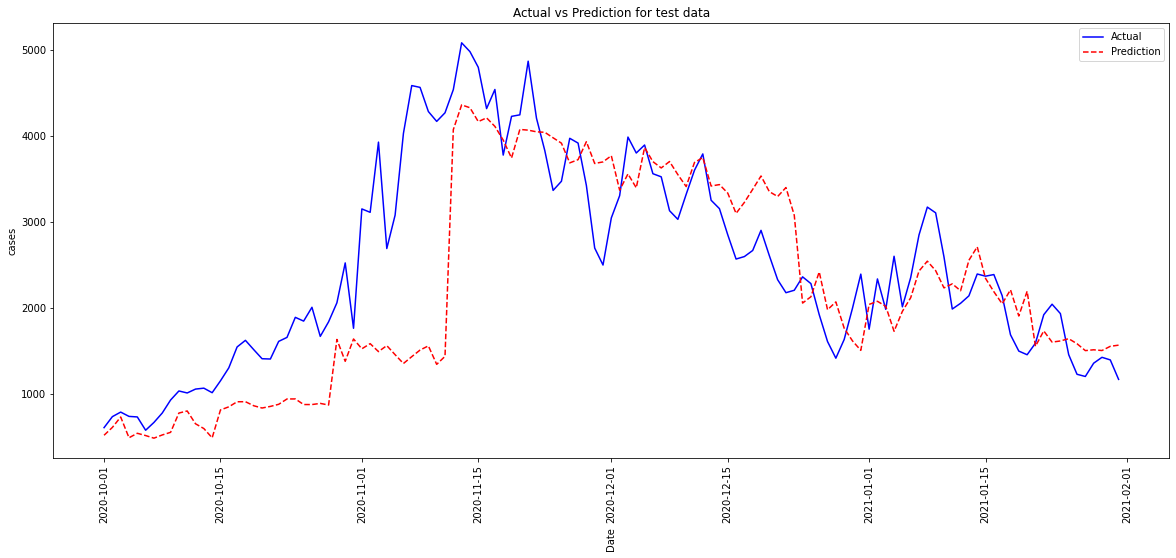

In [ ]:
train=df_case[df_case["date"]<="2020-9-30"]
test=df_case[(df_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], pred_xgboost, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=pred_xgboost,actual=y_test['case'])


In [ ]:
test['mean_case']=np.mean(test['case'])
print('Baseline model: Error')
errors(prediction=test['mean_case'],actual=test['case'])

Baseline model: Error


{'mae': 973.330336880605,
 'mape': 0.5523439078894846,
 'rmse': 1154.9649255348759}

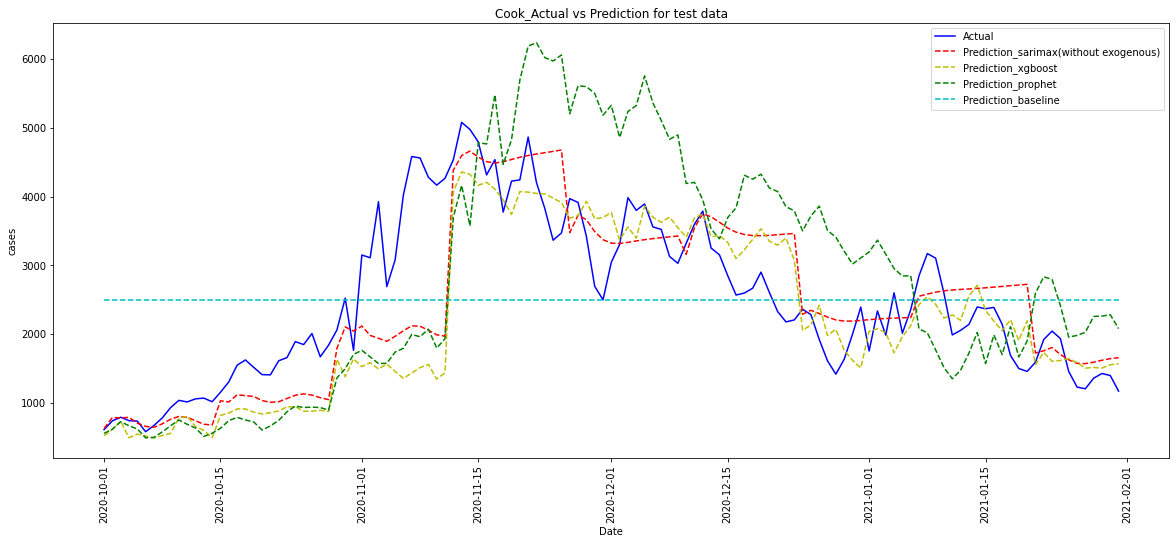

In [ ]:
train=fb_df_case[fb_df_case['ds']<'2020-10-01']
test=fb_df_case[(fb_df_case['ds']>='2020-10-01') & (fb_df_case['ds']<='2021-01-31') ]

test['mean_case']=np.mean(test['y'])

plt.figure(figsize=(20, 8))
plt.plot(test['ds'], test['y'], 'b-', label = 'Actual')
plt.plot(test['ds'], pred_sarimax, 'r--', label = 'Prediction_sarimax(without exogenous)')
plt.plot(test['ds'], pred_xgboost, 'y--', label = 'Prediction_xgboost')
plt.plot(test['ds'], pred_prophet, 'g--', label = 'Prediction_prophet')
plt.plot(test['ds'], test['mean_case'], 'c--', label = 'Prediction_baseline')

plt.xlabel('Date'); plt.ylabel('cases'); plt.title('Cook_Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()

In [ ]:
models=['baseline','sarimax (without exogenous)','xgboost','prophet']
actual=y_test['case'].values
MAE=[np.mean(np.abs(test['mean_case']-actual)),np.mean(np.abs(pred_sarimax-actual)),np.mean(np.abs(pred_xgboost-actual)),np.mean(np.abs(pred_prophet-actual))]
MAPE=[np.mean(np.abs(test['mean_case']-actual)/np.abs(actual)),np.mean(np.abs(pred_sarimax-actual)/np.abs(actual)),np.mean(np.abs(pred_xgboost-actual)/np.abs(actual)),np.mean(np.abs(pred_prophet-actual)/np.abs(actual))]
RMSE=[np.mean((test['mean_case']-actual)**2)**0.5,np.mean((pred_sarimax-actual)**2)**0.5,np.mean((pred_xgboost-actual)**2)**0.5, np.mean((pred_prophet-actual)**2)**0.5]

In [ ]:
Error=pd.DataFrame(models, columns=['Models'])
Error['MAE']=MAE
Error['MAPE']=MAPE
Error['RMSE']=RMSE
Error


,Models,MAE,MAPE,RMSE
0,baseline,973.330337,0.552344,1154.964926
1,sarimax (without exogenous),545.402983,0.226744,756.992782
2,xgboost,597.042637,0.247773,876.466522
3,prophet,1078.329193,0.441816,1283.367739


### Forecast

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_cook_including_lag.csv')
df['date']=pd.to_datetime(df['date'])
df=df.drop(['public_holiday','gatherings','death','lag_14_death','avg.temp','pop_stay_at_home', 'air_traffic'], axis=1)
Forecast=df[df['date']>='2021-02-01']
Forecast

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
374,2021-02-01,NaN,0,0,0,1,1,1,374,248,147,93,67,38,2021,2,1,1,0,0,0,0,0,1690.333333,26.5,1392541.0,1.044186e+06,360.0,234.0,133.0,79.0,53.0,24.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0
375,2021-02-02,NaN,0,0,0,1,1,1,375,249,148,94,68,39,2021,2,2,0,0,0,0,1,0,1501.000000,22.0,1673302.0,1.044186e+06,361.0,235.0,134.0,80.0,54.0,25.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0
376,2021-02-03,NaN,0,0,0,1,1,1,376,250,149,95,69,40,2021,2,3,0,0,0,0,0,1,1458.666667,23.5,1624453.0,1.044186e+06,362.0,236.0,135.0,81.0,55.0,26.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0
377,2021-02-04,NaN,0,0,0,1,1,1,377,251,150,96,70,41,2021,2,4,0,0,0,1,0,0,1592.333333,23.0,1477028.0,1.044186e+06,363.0,237.0,136.0,82.0,56.0,27.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0
378,2021-02-05,NaN,0,0,0,1,1,1,378,252,151,97,71,42,2021,2,5,0,0,0,0,0,0,1923.000000,30.5,1449427.0,1.044186e+06,364.0,238.0,137.0,83.0,57.0,28.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0
379,2021-02-06,NaN,0,0,0,1,1,1,379,253,152,98,72,43,2021,2,6,0,1,0,0,0,0,2045.000000,15.5,1434916.0,1.044186e+06,365.0,239.0,138.0,84.0,58.0,29.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0
380,2021-02-07,NaN,0,0,0,1,1,1,380,254,153,99,73,44,2021,2,7,0,0,1,0,0,0,1936.333333,19.0,1592507.0,1.044186e+06,366.0,240.0,139.0,85.0,59.0,30.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0
381,2021-02-08,NaN,0,0,0,1,1,1,381,255,154,100,74,45,2021,2,8,1,0,0,0,0,0,1459.333333,29.0,1544259.0,1.044186e+06,367.0,241.0,140.0,86.0,60.0,31.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0
382,2021-02-09,NaN,0,0,0,1,1,1,382,256,155,101,75,46,2021,2,9,0,0,0,0,1,0,1231.666667,31.0,1679133.0,1.044186e+06,368.0,242.0,141.0,87.0,61.0,32.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0
383,2021-02-10,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,1206.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
#Train, test and forecast split
train=df[df["date"]<='2021-01-31']
X_train=train.drop(['date','case'],axis=1).values
y_train=train['case'].values

forecast=Forecast.drop(['date','case'],axis=1).values

xgb = XGBRegressor(n_estimators=gsearch.best_params_['n_estimators'],subsample=gsearch.best_params_['subsample'],colsample_bytree=gsearch.best_params_['colsample_bytree'],learning_rate=gsearch.best_params_['learning_rate'],max_depth=gsearch.best_params_['max_depth'], min_child_weight=gsearch.best_params_['min_child_weight'])
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(forecast)


[17:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
train=df_case[df_case["date"]<='2021-01-31'].set_index('date')
train.dropna(inplace=True)
  
model = SARIMAX(train['case'], order=(3,1,4), trend='c')
results=model.fit()

#predict on test data
start=len(train)
end=len(train)+13
pred_sarimax=results.predict(start,end,typ='levels')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



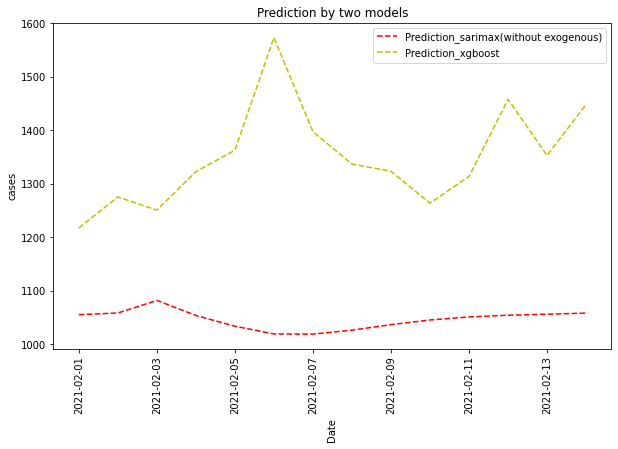

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Forecast['date'], pred_sarimax, 'r--', label = 'Prediction_sarimax(without exogenous)')
plt.plot(Forecast['date'], xgb_pred, 'y--', label = 'Prediction_xgboost')

plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Prediction by two models')
plt.xticks(rotation=90)
plt.legend()

In [ ]:
test

,ds,y,lag_14_case,days_since_outbreak,mean_case
251,2020-10-01,612.333333,573.000000,251,2502.663957
252,2020-10-02,740.000000,630.000000,252,2502.663957
253,2020-10-03,793.000000,776.666667,253,2502.663957
254,2020-10-04,743.000000,698.333333,254,2502.663957
255,2020-10-05,736.666667,672.333333,255,2502.663957
...,...,...,...,...,...
369,2021-01-27,1206.333333,2142.333333,369,2502.663957
370,2021-01-28,1360.333333,2395.666667,370,2502.663957
371,2021-01-29,1428.666667,2370.333333,371,2502.663957
372,2021-01-30,1398.666667,2389.333333,372,2502.663957


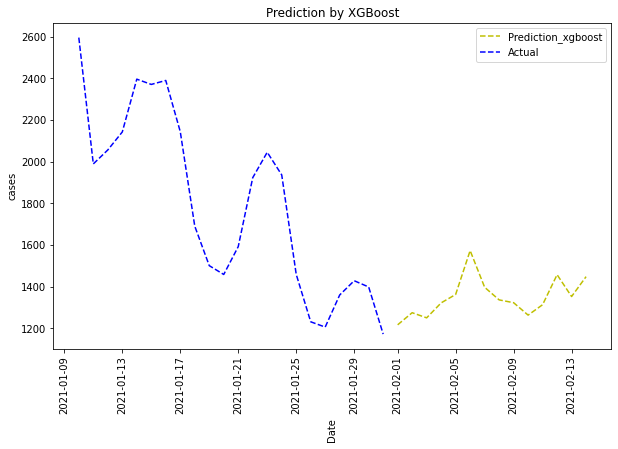

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Forecast['date'], xgb_pred, 'y--', label = 'Prediction_xgboost')

plt.plot(test[test['ds']>='2021-01-10']['ds'], test[test['ds']>='2021-01-10']['y'], 'b--', label = 'Actual')

plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Prediction by XGBoost')

plt.xticks(rotation=90)
plt.legend()

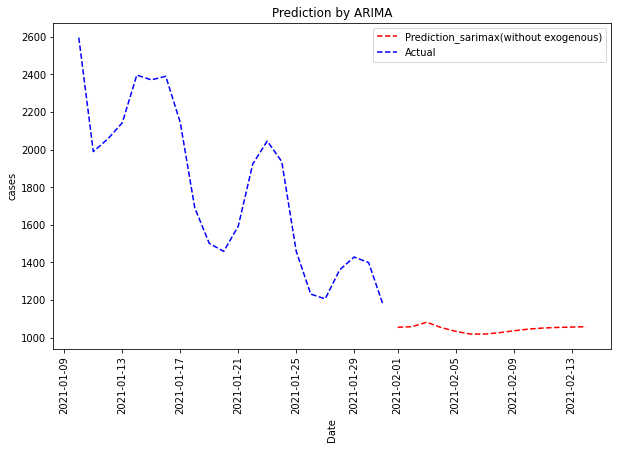

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Forecast['date'], pred_sarimax, 'r--', label = 'Prediction_sarimax(without exogenous)')
plt.plot(test[test['ds']>='2021-01-10']['ds'], test[test['ds']>='2021-01-10']['y'], 'b--', label = 'Actual')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Prediction by ARIMA')
plt.xticks(rotation=90)
plt.legend()

## Total US

In [ ]:
us=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_us_including_lag.csv')
us['date']=pd.to_datetime(us['date'])
us

,date,case,death,avg.temp,pop_stay_at_home,air_traffic,public_holiday,gatherings,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_death,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-21,1.000000,0.0,21.0,1124374.0,3545834.0,No,No,0,0,0,0,0,0,-3,0,0,0,0,0,2020,1,21,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,0.500000,0.0,21.5,1075472.0,3545834.0,No,No,0,0,0,0,0,0,-2,0,0,0,0,0,2020,1,22,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,0.333333,0.0,28.0,1127445.0,3545834.0,No,No,0,0,0,0,0,0,-1,0,0,0,0,0,2020,1,23,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,0.333333,0.0,31.5,1096712.0,3545834.0,No,No,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-25,0.666667,0.0,34.5,1212883.0,3545834.0,No,No,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2021-02-10,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,154320.333333,3369.000000,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
387,2021-02-11,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,157502.000000,4022.666667,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
388,2021-02-12,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,162184.333333,3857.000000,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0
389,2021-02-13,NaN,NaN,NaN,NaN,NaN,No,No,0,0,0,1,1,1,386,260,159,105,79,50,2021,2,13,0,1,0,0,0,0,154939.666667,3369.666667,23.5,1467123.0,1.044186e+06,372.0,246.0,145.0,91.0,65.0,36.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
us_averaged_case=us.drop(['public_holiday','gatherings','death','lag_14_death','avg.temp','pop_stay_at_home', 'air_traffic'], axis=1)
us_averaged_case

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
0,2020-01-21,1.000000,0,0,0,0,0,0,-3,0,0,0,0,0,2020,1,21,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,0.500000,0,0,0,0,0,0,-2,0,0,0,0,0,2020,1,22,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,0.333333,0,0,0,0,0,0,-1,0,0,0,0,0,2020,1,23,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-25,0.666667,0,0,0,0,0,0,1,0,0,0,0,0,2020,1,25,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2021-02-10,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,154320.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0
387,2021-02-11,NaN,0,0,0,1,1,1,384,258,157,103,77,48,2021,2,11,0,0,0,1,0,0,157502.000000,19.0,1504432.0,1.044186e+06,370.0,244.0,143.0,89.0,63.0,34.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0
388,2021-02-12,NaN,0,0,0,1,1,1,385,259,158,104,78,49,2021,2,12,0,0,0,0,0,0,162184.333333,18.0,1441925.0,1.044186e+06,371.0,245.0,144.0,90.0,64.0,35.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0
389,2021-02-13,NaN,0,0,0,1,1,1,386,260,159,105,79,50,2021,2,13,0,1,0,0,0,0,154939.666667,23.5,1467123.0,1.044186e+06,372.0,246.0,145.0,91.0,65.0,36.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
us_averaged_case['date'] = pd.to_datetime(us_averaged_case['date'])
us_averaged_case=us_averaged_case[us_averaged_case['date']<='2021-01-31']

starting_date='2020-09-30'
ending_date='2021-01-31'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=us_averaged_case[us_averaged_case["date"]<=starting_date]
  test=us_averaged_case[(us_averaged_case["date"]>starting_date) & (us_averaged_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  xgb = XGBRegressor(n_estimators=100)
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


#Feature importance xgb
feature_importances_xgb=xgb.feature_importances_
features= X_train.columns
feature_importances_xgb=pd.DataFrame(list(zip(features,feature_importances_xgb)), columns=['features','importance']).sort_values('importance', ascending=False)

us_averaged_case=us_averaged_case.drop(feature_importances_xgb[feature_importances_xgb['importance']<=0] ['features'].values, axis=1)


starting_date='2020-09-30'
ending_date='2021-01-31'
pred=[]
best_parameters=[]
best_score=[]


while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=us_averaged_case[us_averaged_case["date"]<=starting_date]
  test=us_averaged_case[(us_averaged_case["date"]>starting_date) & (us_averaged_case["date"]<=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  X_train=train.drop(['case','date'],axis=1)
  y_train=train[['case']]

  X_test=test.drop(['case','date'],axis=1)
  y_test=test[['case']]


  #XGBoost hyper-parameter tuning

  param_tuning = {
        'learning_rate': [0.01, 0.1,0.5],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
  }

  xgb_model = XGBRegressor()

  #mape= mape=np.mean(np.abs(prediction-actual)/np.abs(actual))

  gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)

  gsearch.fit(X_train,y_train)

  best_parameters.append(gsearch.best_params_)
  best_score.append(gsearch.best_score_)

  xgb = XGBRegressor(n_estimators=gsearch.best_params_['n_estimators'],subsample=gsearch.best_params_['subsample'],colsample_bytree=gsearch.best_params_['colsample_bytree'],learning_rate=gsearch.best_params_['learning_rate'],max_depth=gsearch.best_params_['max_depth'], min_child_weight=gsearch.best_params_['min_child_weight'])
  xgb.fit(X_train,y_train)
  xgb_pred = xgb.predict(X_test)
  pred.append(xgb_pred)

  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])


pred_xgboost=predictions





[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:56:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3060 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4160 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.4min finished


[19:01:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2182 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3082 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4182 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.6min finished


[19:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3070 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4170 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4317 out of 4320 | elapsed:  5.8min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[19:13:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2168 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3068 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4168 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.1min finished


[19:19:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.3min finished


[19:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2724 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3754 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.6min finished


[19:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1822 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2722 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3746 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.8min finished


[19:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 1110 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1810 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2710 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  6.9min finished


[19:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1110 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1878 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2716 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3596 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.2min finished


[19:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Errors


{'mae': 26401.90477853997,
 'mape': 0.1817454048501555,
 'rmse': 33656.42343105951}

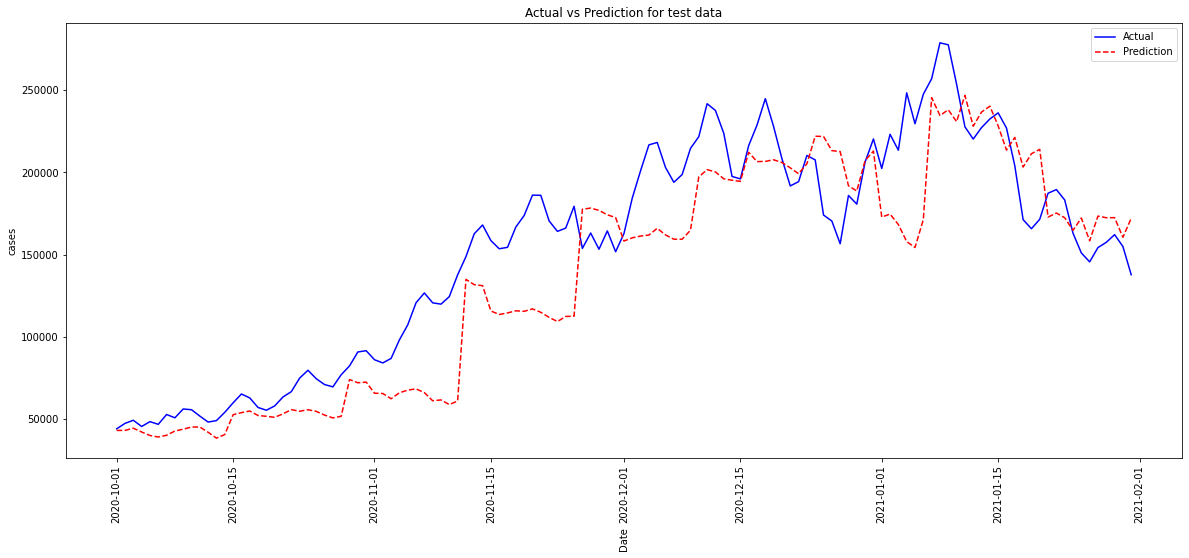

In [ ]:
train=us_averaged_case[us_averaged_case["date"]<="2020-9-30"]
test=us_averaged_case[(us_averaged_case["date"]>"2020-9-30")]

X_train=train.drop(['case','date'],axis=1)
y_train=train[['case']]

X_test=test.drop(['case','date'],axis=1)
y_test=test[['case']]


plt.figure(figsize=(20, 8))
plt.plot(test['date'], y_test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], pred_xgboost, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()



print('Errors')
errors(prediction=pred_xgboost,actual=y_test['case'])

In [ ]:
us_averaged_case['date'] = pd.to_datetime(us_averaged_case['date'])
df_case=us_averaged_case[us_averaged_case['date']<='2021-01-31']

starting_date='2020-10-01'
ending_date='2021-01-31'
pred=[]

while pd.to_datetime(starting_date) < pd.to_datetime(datetime.strptime(ending_date, "%Y-%m-%d")):
  train=df_case[df_case["date"]<starting_date]
  test=df_case[(df_case["date"]>=starting_date) & (df_case["date"]<pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)))]
  
  train.dropna(inplace=True)
  test.dropna(inplace=True)

  train.set_index('date', inplace=True)
  test.set_index('date', inplace=True)

  
  model = SARIMAX(train['case'], order=(3,1,4), trend='c')
  results=model.fit()

  #predict on test data
  start=len(train)
  end=len(train)+len(test)-1
  pred_sarimax=results.predict(start,end,typ='levels')


  pred.append(pred_sarimax)
  
  starting_date=pd.to_datetime(datetime.strptime(starting_date, "%Y-%m-%d") +timedelta(days=14)).strftime('%Y-%m-%d')


predictions=[]
for i in range(len(pred)):
  for j in range(len(pred[i])):
    predictions.append(pred[i][j])

pred_sarimax=predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/

Errors


{'mae': 20146.104964523416,
 'mape': 0.13614514083871457,
 'rmse': 26262.087518035103}

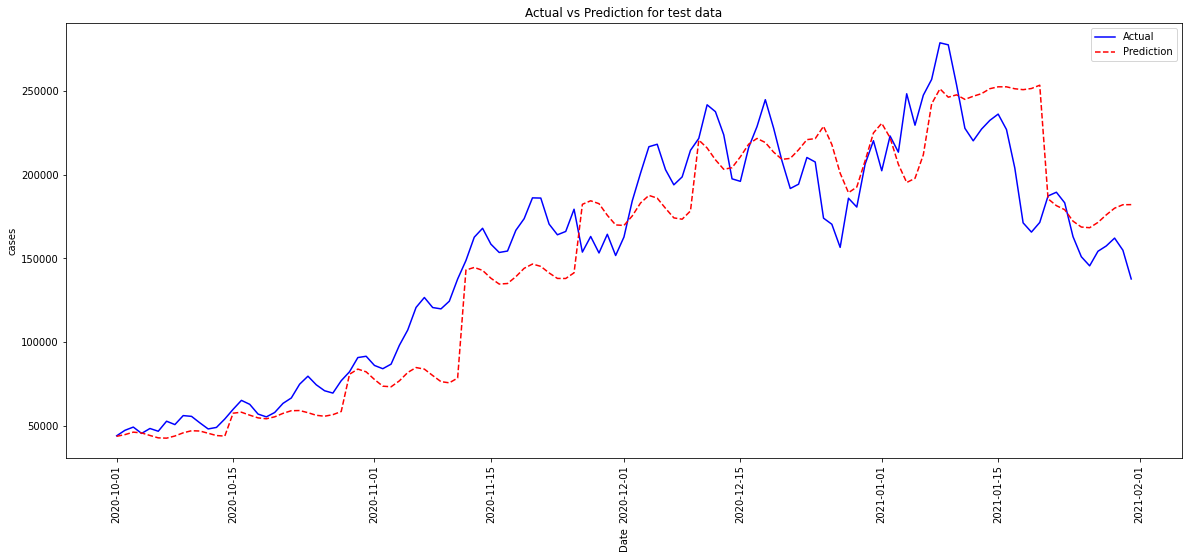

In [ ]:
train=df_case[df_case["date"]<"2020-10-01"]
test=df_case[(df_case["date"]>="2020-10-01")]

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], pred_sarimax, 'r--', label = 'Prediction')
plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.legend()


print('Errors')
errors(prediction=pred_sarimax,actual=test['case'])


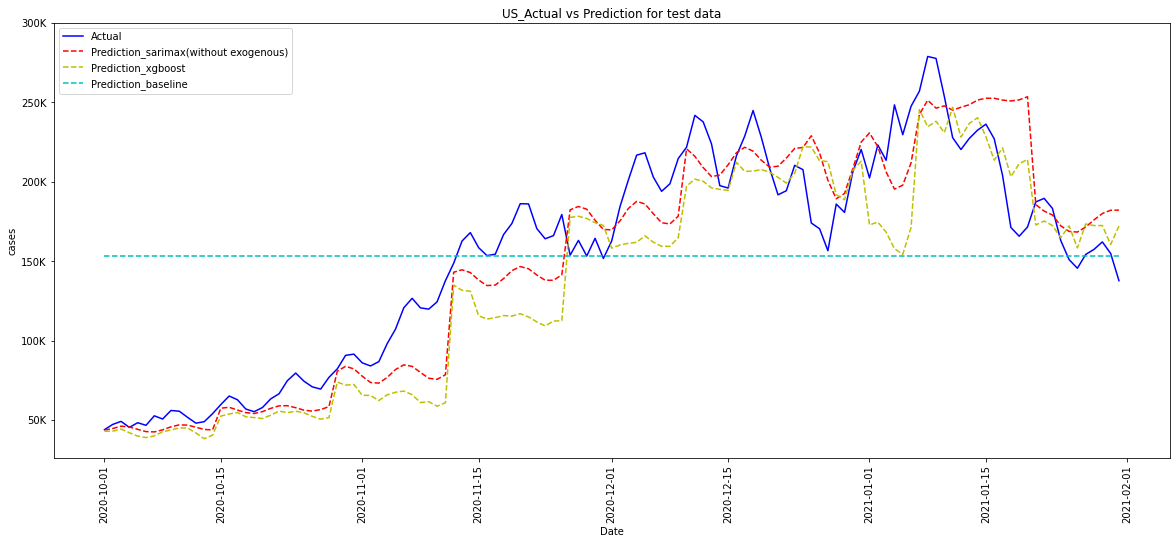

In [ ]:
train=df_case[df_case['date']<'2020-10-01']
test=df_case[(df_case['date']>='2020-10-01') & (df_case['date']<='2021-01-31') ]

test['mean_case']=np.mean(test['case'])

plt.figure(figsize=(20, 8))
plt.plot(test['date'], test['case'], 'b-', label = 'Actual')
plt.plot(test['date'], pred_sarimax, 'r--', label = 'Prediction_sarimax(without exogenous)')
plt.plot(test['date'], pred_xgboost, 'y--', label = 'Prediction_xgboost')
plt.plot(test['date'], test['mean_case'], 'c--', label = 'Prediction_baseline')

plt.xlabel('Date'); plt.ylabel('cases'); plt.title('US_Actual vs Prediction for test data')
plt.xticks(rotation=90)
plt.yticks([50000,100000,150000,200000,250000,300000],['50K','100K','150K','200K','250K','300K'])
plt.legend()

In [ ]:
models=['baseline','sarimax (without exogenous)','xgboost']
actual=y_test['case'].values
MAE=[np.mean(np.abs(test['mean_case']-actual)),np.mean(np.abs(pred_sarimax-actual)),np.mean(np.abs(pred_xgboost-actual))]
MAPE=[np.mean(np.abs(test['mean_case']-actual)/np.abs(actual)),np.mean(np.abs(pred_sarimax-actual)/np.abs(actual)),np.mean(np.abs(pred_xgboost-actual)/np.abs(actual))]
RMSE=[np.mean((test['mean_case']-actual)**2)**0.5,np.mean((pred_sarimax-actual)**2)**0.5,np.mean((pred_xgboost-actual)**2)**0.5]

In [ ]:
Errors=pd.DataFrame(models, columns=['Models'])
Errors['MAE']=MAE
Errors['MAPE']=MAPE
Errors['RMSE']=RMSE
Errors


,Models,MAE,MAPE,RMSE
0,baseline,54747.568643,0.573281,65055.432107
1,sarimax (without exogenous),20146.104965,0.136145,26262.087518
2,xgboost,26401.904779,0.181745,33656.423431


### Forecast

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_3_final/df_us_including_lag.csv')
df['date']=pd.to_datetime(df['date'])
df=df.drop(['public_holiday','gatherings','death','lag_14_death','avg.temp','pop_stay_at_home', 'air_traffic'], axis=1)
Forecast=df[df['date']>='2021-02-01']
Forecast

,date,case,holiday_surge_cases,stay_home_order,BLM_Protest,travel_ban_china,travel_ban_Europe,travel_ban_Brazil,days_since_outbreak,days_since_BLM_Protest,days_since_Labor Day,days_since_Halloween,days_since_Thanksgiving,days_since_Christmas Day,Year,Month,Day,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,lag_14_case,lag_14_avg.temp,lag_14_pop_stay_at_home,lag_14_air_traffic,lag_14_days_since_outbreak,lag_14_days_since_BLM_Protest,lag_14_days_since_Labor Day,lag_14_days_since_Halloween,lag_14_days_since_Thanksgiving,lag_14_days_since_Christmas Day,lag_14_Day,lag_14_holiday_surge_cases,lag_14_stay_home_order,lag_14_BLM_Protest,lag_14_travel_ban_china,lag_14_travel_ban_Europe,lag_14_travel_ban_Brazil
377,2021-02-01,NaN,0,0,0,1,1,1,374,248,147,93,67,38,2021,2,1,1,0,0,0,0,0,171309.333333,26.5,1392541.0,1.044186e+06,360.0,234.0,133.0,79.0,53.0,24.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0
378,2021-02-02,NaN,0,0,0,1,1,1,375,249,148,94,68,39,2021,2,2,0,0,0,0,1,0,165779.666667,22.0,1673302.0,1.044186e+06,361.0,235.0,134.0,80.0,54.0,25.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0
379,2021-02-03,NaN,0,0,0,1,1,1,376,250,149,95,69,40,2021,2,3,0,0,0,0,0,1,171544.333333,23.5,1624453.0,1.044186e+06,362.0,236.0,135.0,81.0,55.0,26.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0
380,2021-02-04,NaN,0,0,0,1,1,1,377,251,150,96,70,41,2021,2,4,0,0,0,1,0,0,187373.333333,23.0,1477028.0,1.044186e+06,363.0,237.0,136.0,82.0,56.0,27.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0
381,2021-02-05,NaN,0,0,0,1,1,1,378,252,151,97,71,42,2021,2,5,0,0,0,0,0,0,189597.333333,30.5,1449427.0,1.044186e+06,364.0,238.0,137.0,83.0,57.0,28.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0
382,2021-02-06,NaN,0,0,0,1,1,1,379,253,152,98,72,43,2021,2,6,0,1,0,0,0,0,183273.000000,15.5,1434916.0,1.044186e+06,365.0,239.0,138.0,84.0,58.0,29.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0
383,2021-02-07,NaN,0,0,0,1,1,1,380,254,153,99,73,44,2021,2,7,0,0,1,0,0,0,163069.000000,19.0,1592507.0,1.044186e+06,366.0,240.0,139.0,85.0,59.0,30.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0
384,2021-02-08,NaN,0,0,0,1,1,1,381,255,154,100,74,45,2021,2,8,1,0,0,0,0,0,151056.666667,29.0,1544259.0,1.044186e+06,367.0,241.0,140.0,86.0,60.0,31.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0
385,2021-02-09,NaN,0,0,0,1,1,1,382,256,155,101,75,46,2021,2,9,0,0,0,0,1,0,145614.666667,31.0,1679133.0,1.044186e+06,368.0,242.0,141.0,87.0,61.0,32.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0
386,2021-02-10,NaN,0,0,0,1,1,1,383,257,156,102,76,47,2021,2,10,0,0,0,0,0,1,154320.333333,26.5,1531688.0,1.044186e+06,369.0,243.0,142.0,88.0,62.0,33.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
#Train, test and forecast split
train=df[df["date"]<='2021-01-31']
X_train=train.drop(['date','case'],axis=1).values
y_train=train['case'].values

forecast=Forecast.drop(['date','case'],axis=1).values

xgb = XGBRegressor(n_estimators=gsearch.best_params_['n_estimators'],subsample=gsearch.best_params_['subsample'],colsample_bytree=gsearch.best_params_['colsample_bytree'],learning_rate=gsearch.best_params_['learning_rate'],max_depth=gsearch.best_params_['max_depth'], min_child_weight=gsearch.best_params_['min_child_weight'])
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(forecast)


[19:53:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
train=df_case[df_case["date"]<='2021-01-31'].set_index('date')
train.dropna(inplace=True)
  
model = SARIMAX(train['case'], order=(3,1,4), trend='c')
results=model.fit()

#predict on test data
start=len(train)
end=len(train)+13
pred_sarimax=results.predict(start,end,typ='levels')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



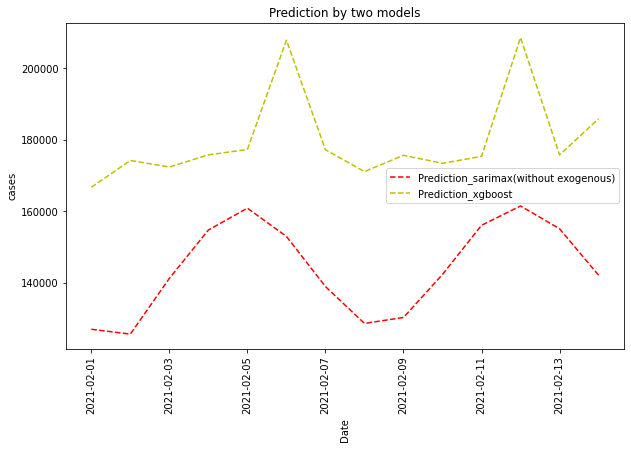

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Forecast['date'], pred_sarimax, 'r--', label = 'Prediction_sarimax(without exogenous)')
plt.plot(Forecast['date'], xgb_pred, 'y--', label = 'Prediction_xgboost')

plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Prediction by two models')
plt.xticks(rotation=90)
plt.legend()

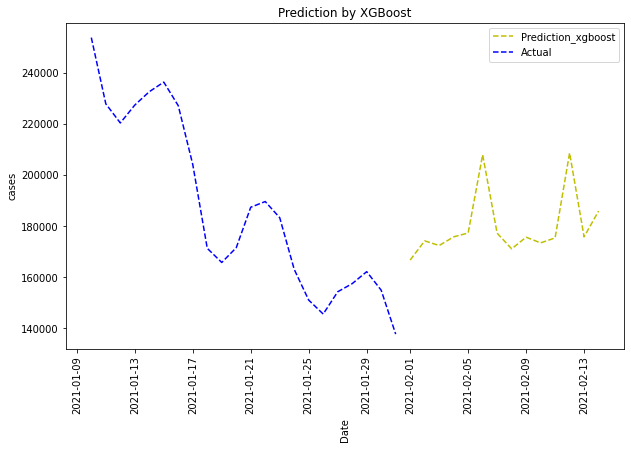

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Forecast['date'], xgb_pred, 'y--', label = 'Prediction_xgboost')
plt.plot(test[test['date']>='2021-01-10']['date'], test[test['date']>='2021-01-10']['case'], 'b--', label = 'Actual')


plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Prediction by XGBoost')

plt.xticks(rotation=90)
plt.legend()

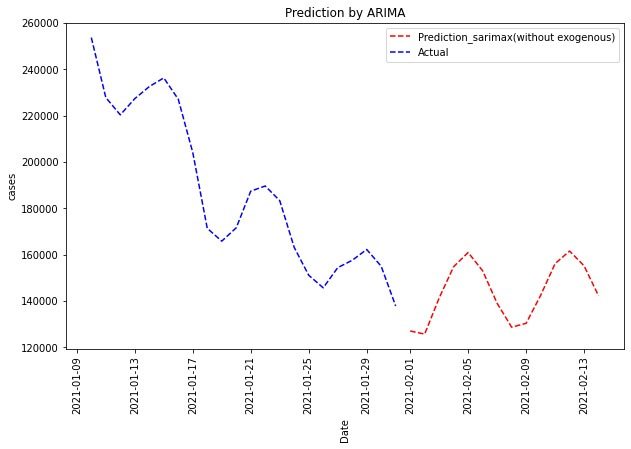

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Forecast['date'], pred_sarimax, 'r--', label = 'Prediction_sarimax(without exogenous)')
plt.plot(test[test['date']>='2021-01-10']['date'], test[test['date']>='2021-01-10']['case'], 'b--', label = 'Actual')

plt.xlabel('Date',rotation=90); plt.ylabel('cases'); plt.title('Prediction by ARIMA')
plt.xticks(rotation=90)
plt.legend()